# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Diamond Price Prediction</p>



The atoms of diamond are grouped in a crystal structure known as diamond cubic, and it is a solid form of the element carbon. The chemically stable form of carbon at room temperature and pressure is another solid form of carbon known as graphite, however diamond is metastable and converts to it at a very slow rate under those conditions. Because of its superior hardness and thermal conductivity compared to other natural materials, diamond is frequently employed in high-tech industrial products like cutting and polishing equipment. The price of Diamond is based on the carat and size. The higher the carat and the bigger the size, the price will be higher too.

The purpose to develop the diamond price prediction is to get the new knowledge from the data and predict the price. 

<a id="1"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Import Libraries</p>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">About Dataset</p>

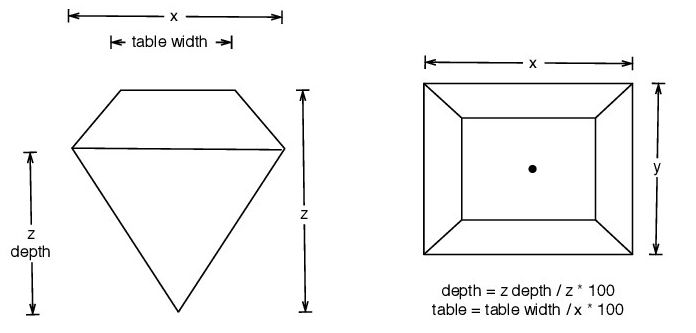</img>

* **carat:** Weight(0.2 to 5.01) of the diamond
* **cut:** Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color:** Diamond colour from J(worst) to D(best)
* **clarity:** Measurement of the purity and rarity of the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* **x:** Length(0 to 10.74) in mm 
* **y:** Width(0 to 58.9) in mm 
* **z:** Depth(0 to 31.8) in mm 
* **depth %:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter. Total depth percentage(43 to 79) = z/mean(x,y) = 2\*z/(x+y)
* **table:** Width(43 to 95) of the top of diamond relative to widest point 
* **price:** Price in US dollar

In [50]:
data = pd.read_csv("diamonds.csv")
data

carat           cut color clarity  depth  table   price   'x'   'y'  \
0       0.23      b'Ideal'  b'E'  b'SI2'   61.5   55.0   326.0  3.95  3.98   
1       0.21    b'Premium'  b'E'  b'SI1'   59.8   61.0   326.0  3.89  3.84   
2       0.23       b'Good'  b'E'  b'VS1'   56.9   65.0   327.0  4.05  4.07   
3       0.29    b'Premium'  b'I'  b'VS2'   62.4   58.0   334.0  4.20  4.23   
4       0.31       b'Good'  b'J'  b'SI2'   63.3   58.0   335.0  4.34  4.35   
...      ...           ...   ...     ...    ...    ...     ...   ...   ...   
53935   0.72      b'Ideal'  b'D'  b'SI1'   60.8   57.0  2757.0  5.75  5.76   
53936   0.72       b'Good'  b'D'  b'SI1'   63.1   55.0  2757.0  5.69  5.75   
53937   0.70  b'Very Good'  b'D'  b'SI1'   62.8   60.0  2757.0  5.66  5.68   
53938   0.86    b'Premium'  b'H'  b'SI2'   61.0   58.0  2757.0  6.15  6.12   
53939   0.75      b'Ideal'  b'D'  b'SI2'   62.2   55.0  2757.0  5.83  5.87   

        'z'  
0      2.43  
1      2.31  
2      2.31  
3      2.63  
4      2.75  
...     ...  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64  

[53940 rows x 10 columns]

<a id="3"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Data Exploration</p>

In [51]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"color":"black","border": "1.5px solid black"})

Shape Of The Dataset : (53940, 10)

Glimpse Of The Dataset :


In [52]:
print(f"Informations Of The Dataset :\n")
print(data.info())


Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Dataset Summary</p>

In [53]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"color":"black","border": "1.5px solid black"})

Summary Of The Dataset :


In [54]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"color":"black","border": "1.5px solid black"})

Null values of the Dataset :


<a id="5"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

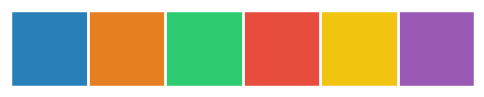

In [55]:
sns.set_style("white")
sns.set(rc={"figure.facecolor":"white","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

palette = ["#2980B9","#E67E22","#2ECC71","#E74C3C","#F1C40F","#9B59B6"]

sns.palplot(sns.color_palette(palette))
plt.show()

<a id="6"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Diamond's Price</p>

Let's have a look on the distribution of prices :


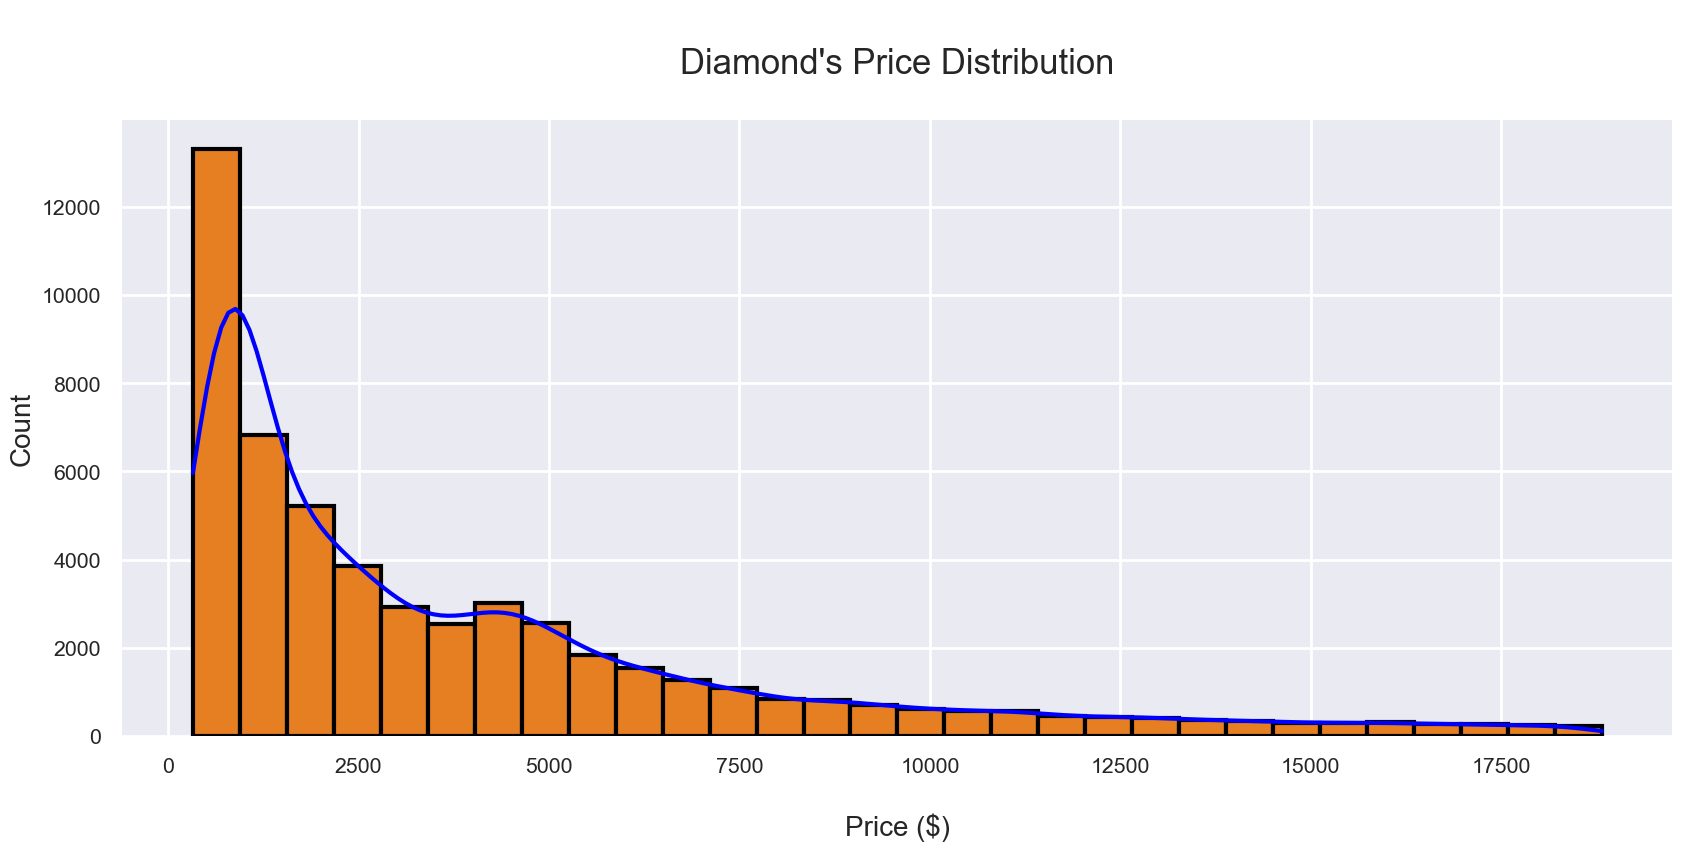

In [56]:
print(f"Let's have a look on the distribution of prices :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["price"],color=palette[1],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("blue")
p.axes.set_title("\nDiamond's Price Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nPrice ($)",fontsize=20)
plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

<a id="7"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Diamond's Cut</p>

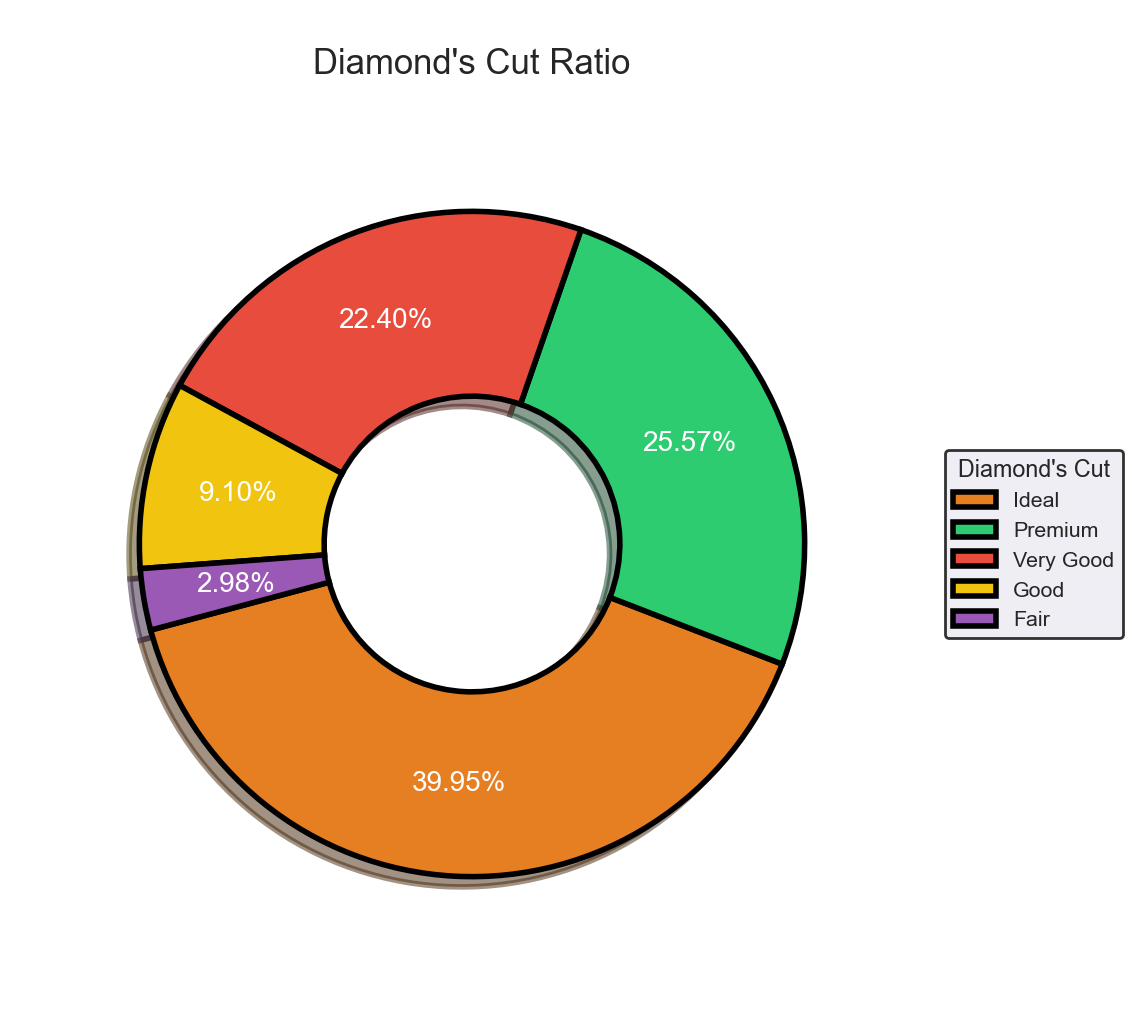

In [57]:
plt.subplots(figsize=(12, 12))

labels = "Ideal","Premium","Very Good","Good","Fair"
size = 0.5

wedges, texts, autotexts = plt.pie([data["cut"].value_counts().values[0],
                                    data["cut"].value_counts().values[1],
                                    data["cut"].value_counts().values[2],
                                    data["cut"].value_counts().values[3],
                                    data["cut"].value_counts().values[4]],
                                    explode = (0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#E67E22","#2ECC71","#E74C3C","#F1C40F","#9B59B6"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels, title="Diamond's Cut",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nDiamond's Cut Ratio",fontsize=25)
plt.show()

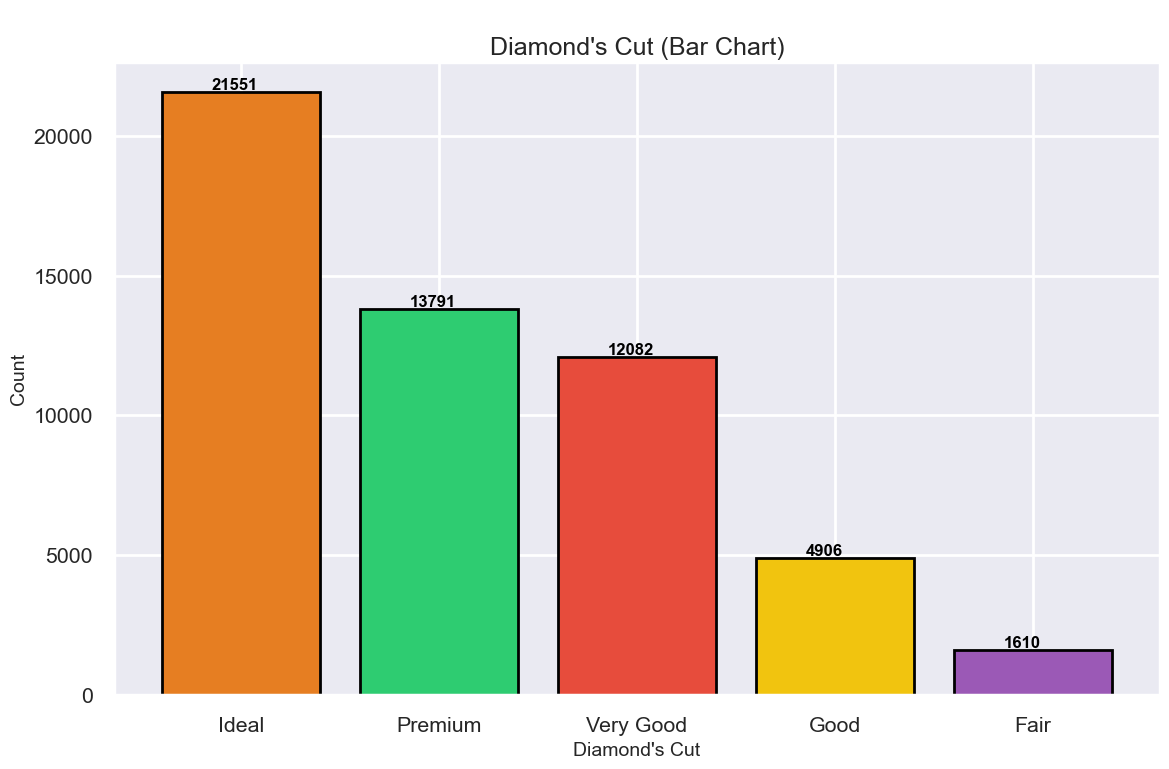

In [58]:
# Data
labels = ["Ideal", "Premium", "Very Good", "Good", "Fair"]
values = [
    data["cut"].value_counts().values[0],
    data["cut"].value_counts().values[1],
    data["cut"].value_counts().values[2],
    data["cut"].value_counts().values[3],
    data["cut"].value_counts().values[4],
]
colors = ["#E67E22", "#2ECC71", "#E74C3C", "#F1C40F", "#9B59B6"]

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(labels, values, color=colors, edgecolor="black", linewidth=2)

# Add data labels above the bars
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.15,
        bar.get_height() + 100,
        f"{value}",
        fontsize=12,
        color="black",
        fontweight="bold",
    )

# Add a title and labels
plt.title("\nDiamond's Cut (Bar Chart)", fontsize=18)
plt.xlabel("Diamond's Cut", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the bar chart
plt.tight_layout()
plt.show()


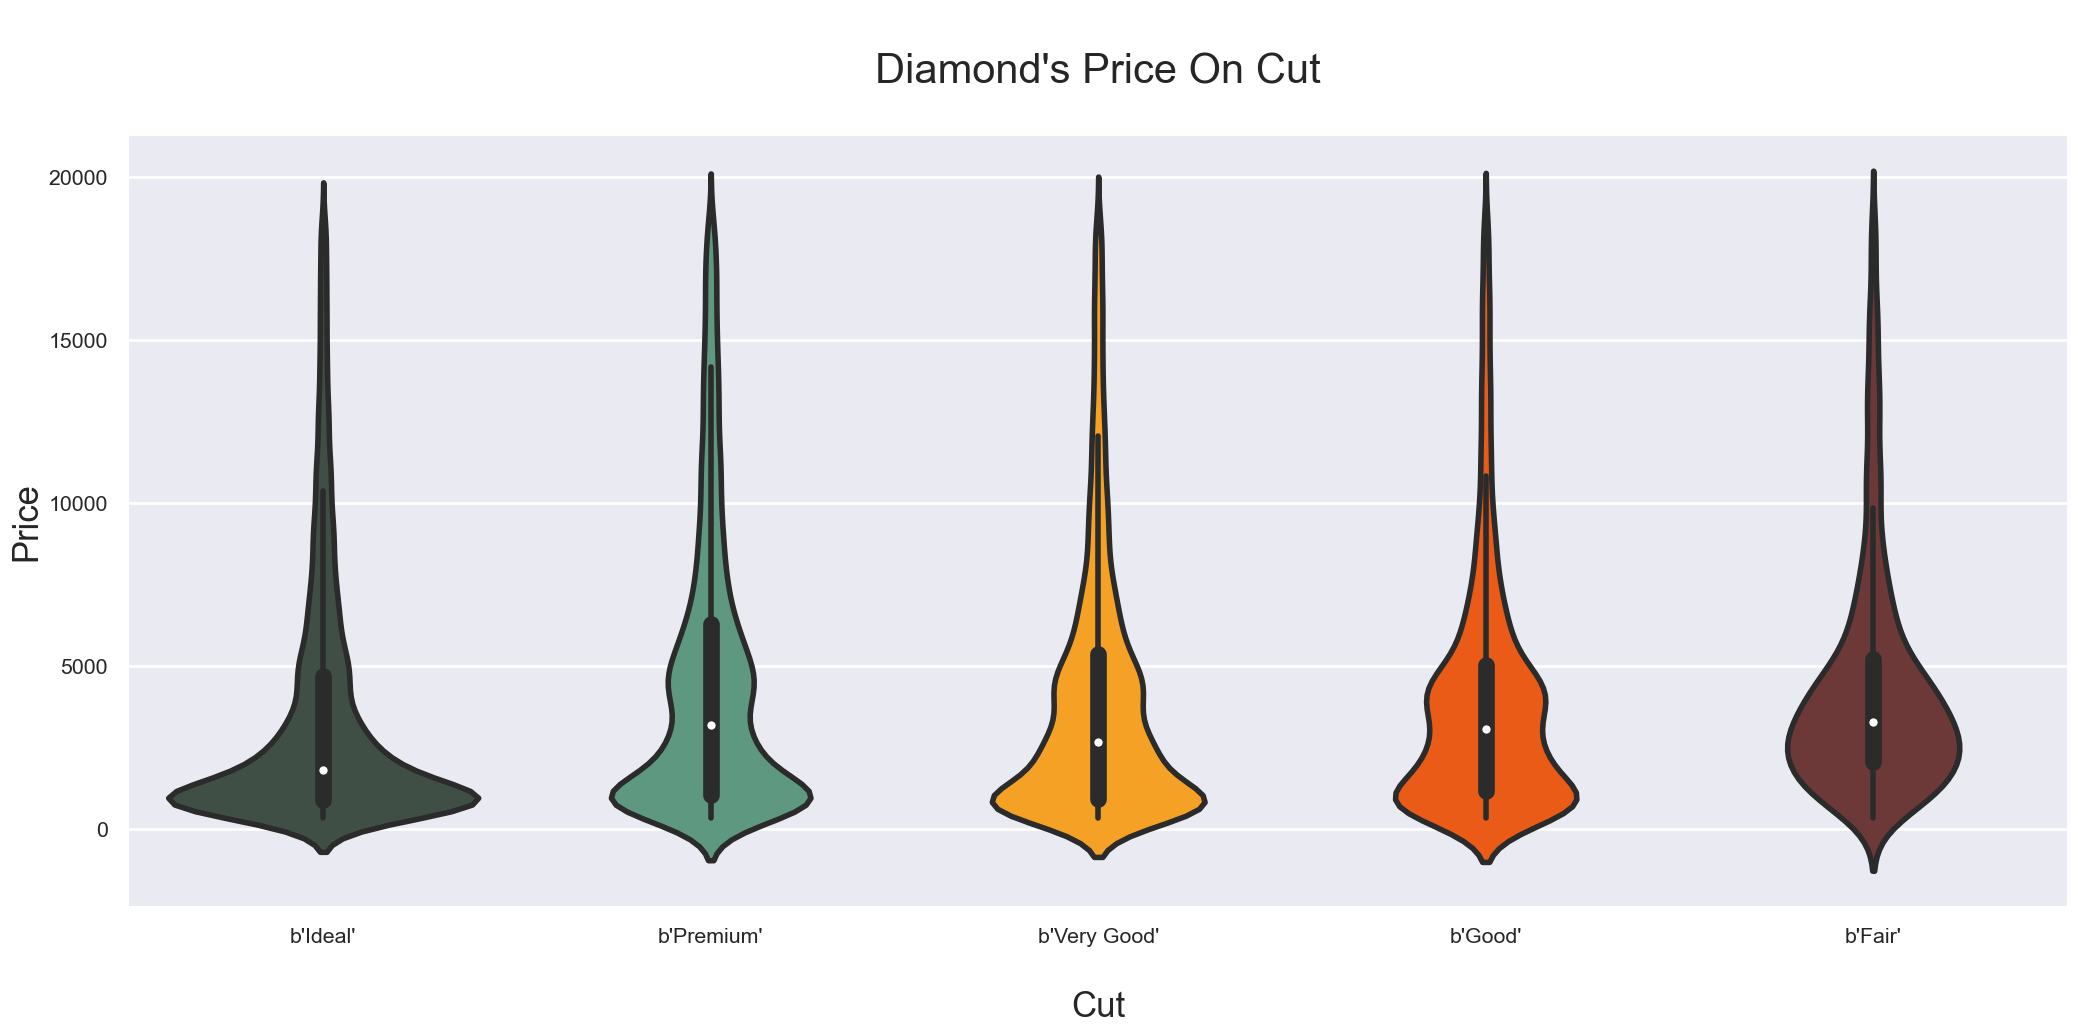

In [59]:
plt.subplots(figsize=(25, 10))

p=sns.violinplot(x=data["cut"],y=data["price"],order=data["cut"].value_counts().index,palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nDiamond's Price On Cut\n",fontsize=30)
p.axes.set_xlabel("\nCut",fontsize=25)
p.axes.set_ylabel("Price",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

<a id="8"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Diamond's Color</p>

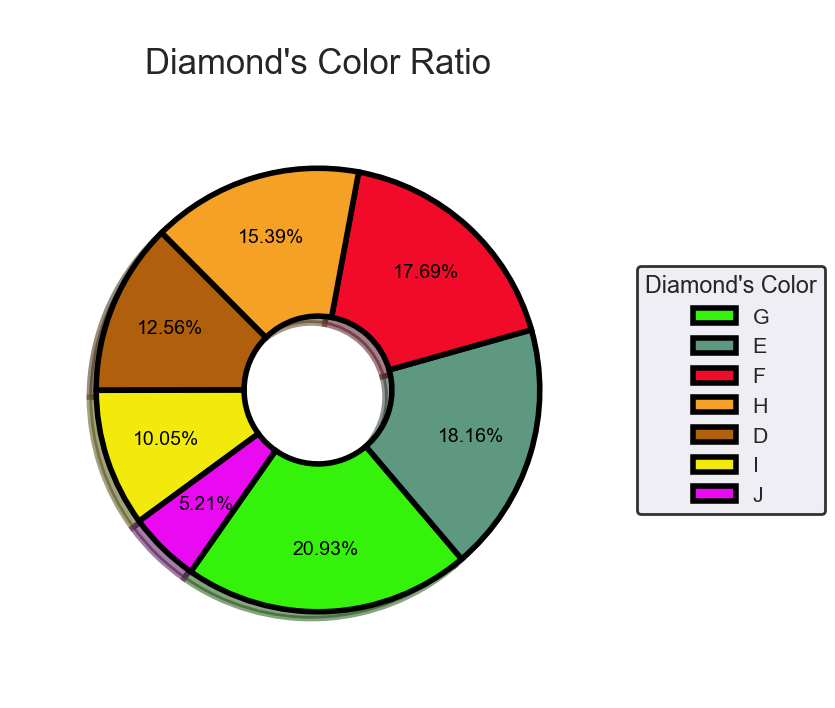

In [60]:

plt.subplots(figsize=(8, 8))

labels = "G","E","F","H","D","I","J"
size = 0.6

fig = plt.gcf()
fig.patch.set_facecolor('#ffffff')

wedges, texts, autotexts = plt.pie([data["color"].value_counts().values[0],
                                    data["color"].value_counts().values[1],
                                    data["color"].value_counts().values[2],
                                    data["color"].value_counts().values[3],
                                    data["color"].value_counts().values[4],
                                    data["color"].value_counts().values[5],
                                    data["color"].value_counts().values[6]],
                                    explode = (0,0,0,0,0,0,0),
                                    textprops=dict(size= 14, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#34f20a","#5e9880","#f20a29","#f5a126","#b05f0d","#f2ea0a","#ea0af2"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -125)

plt.legend(wedges, labels, title="Diamond's Color",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nDiamond's Color Ratio",fontsize=25)
plt.show()

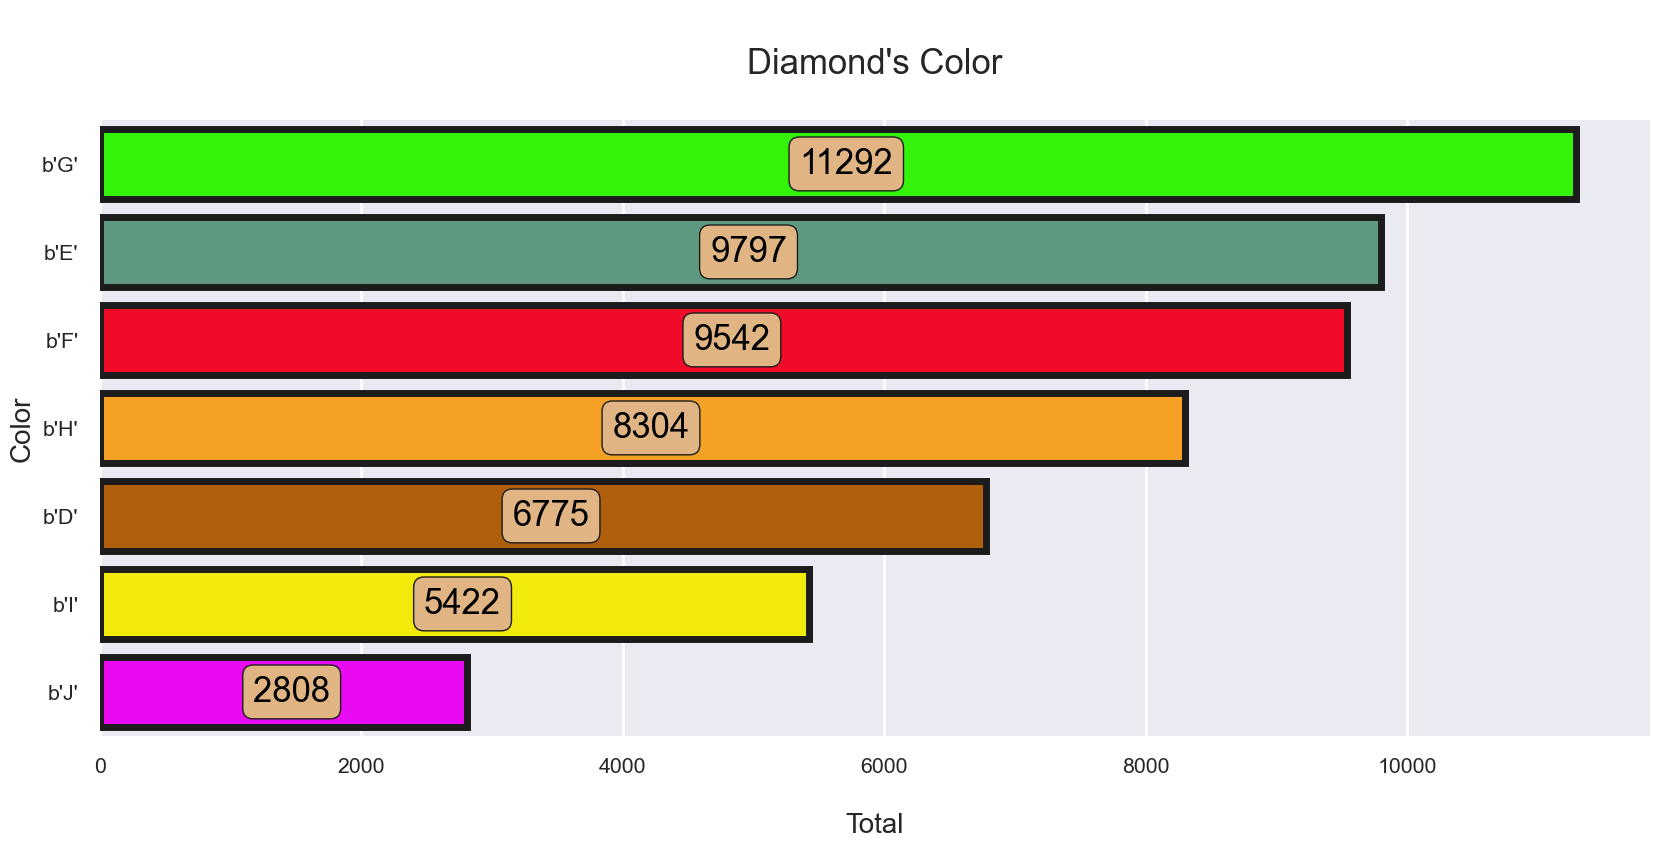

In [61]:
plt.subplots(figsize=(20, 8))

fig = plt.gcf()
fig.patch.set_facecolor('#ffffff')

p=sns.countplot(y=data["color"],order=data["color"].value_counts().index,palette=
                ["#34f20a","#5e9880","#f20a29","#f5a126","#b05f0d","#f2ea0a","#ea0af2"],
                saturation=1, edgecolor = "#1c1c1c", linewidth = 5)

p.axes.set_title("\nDiamond's Color\n",fontsize=25)
p.axes.set_ylabel("Color",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 1, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

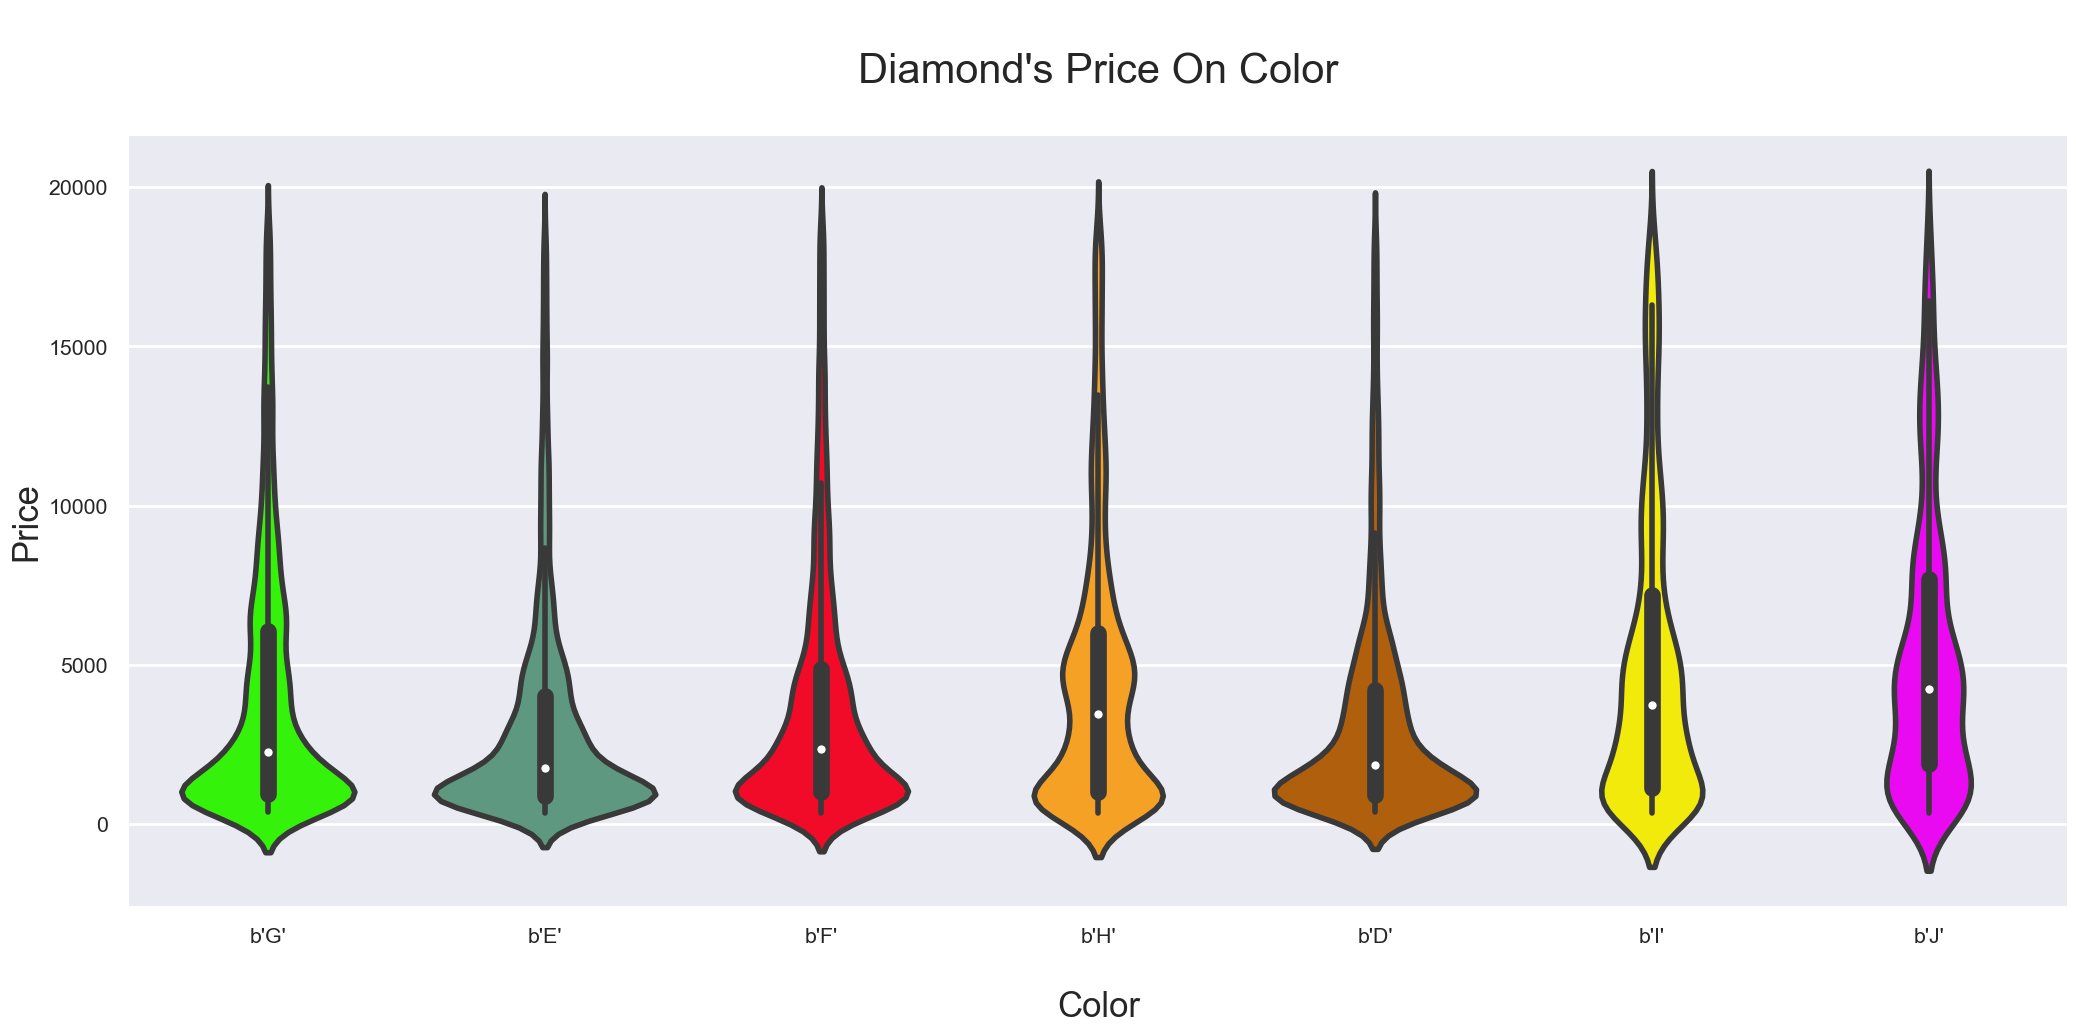

In [62]:

plt.subplots(figsize=(25, 10))

fig = plt.gcf()
fig.patch.set_facecolor('#ffffff')


p=sns.violinplot(x=data["color"],y=data["price"],order=data["color"].value_counts().index,palette=
                 ["#34f20a","#5e9880","#f20a29","#f5a126","#b05f0d","#f2ea0a","#ea0af2"],
                 saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nDiamond's Price On Color\n",fontsize=30)
p.axes.set_xlabel("\nColor",fontsize=25)
p.axes.set_ylabel("Price",fontsize=25)

sns.despine(left=True, bottom=True)

plt.show()

<a id="9"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Diamond's Clarity</p>

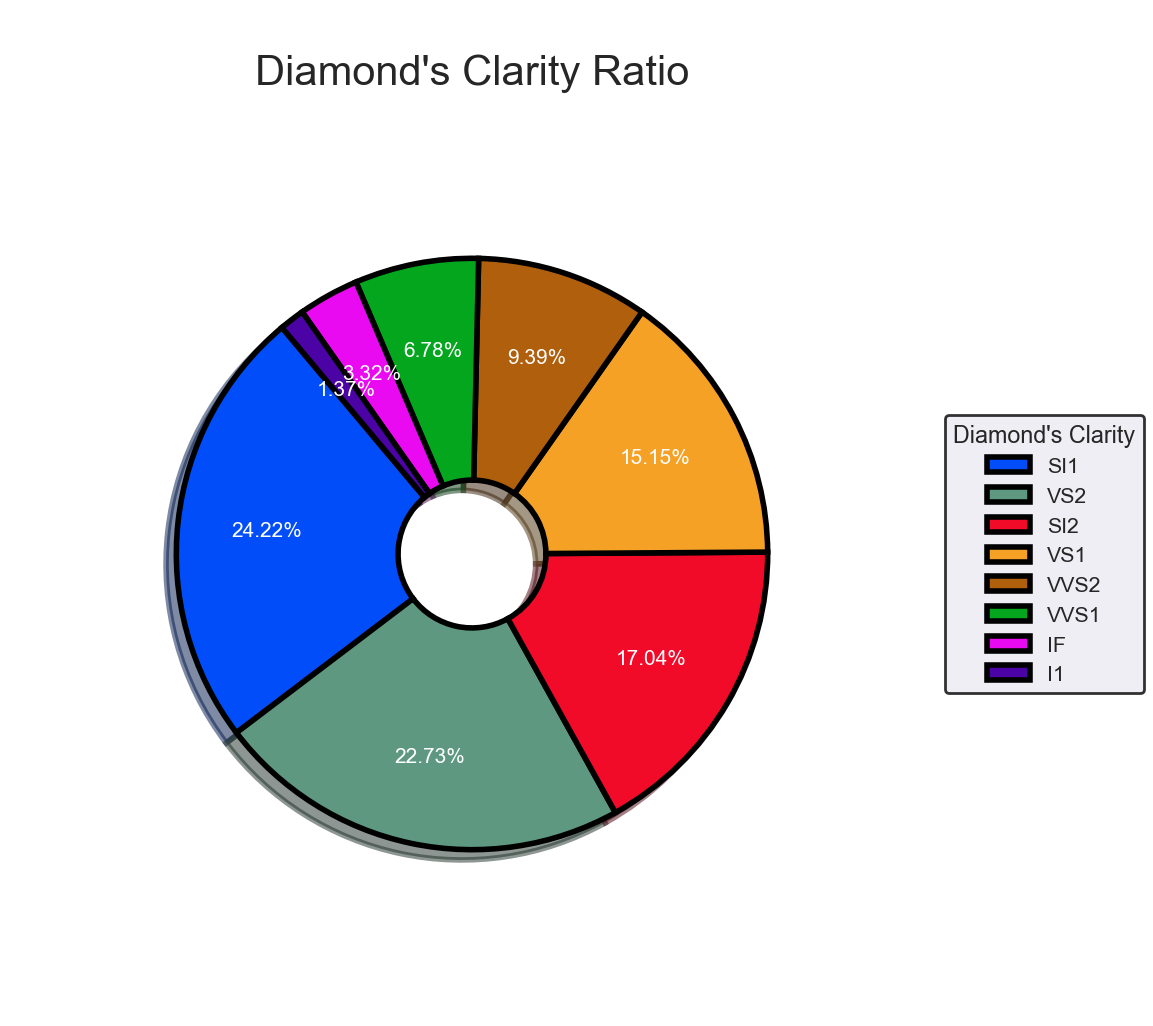

In [63]:

plt.subplots(figsize=(12, 12))

fig = plt.gcf()
fig.patch.set_facecolor('#ffffff')

labels = "SI1","VS2","SI2","VS1","VVS2","VVS1","IF","I1"
size = 0.6

wedges, texts, autotexts = plt.pie([data["clarity"].value_counts().values[0],
                                    data["clarity"].value_counts().values[1],
                                    data["clarity"].value_counts().values[2],
                                    data["clarity"].value_counts().values[3],
                                    data["clarity"].value_counts().values[4],
                                    data["clarity"].value_counts().values[5],
                                    data["clarity"].value_counts().values[6],
                                    data["clarity"].value_counts().values[7]],
                                    explode = (0,0,0,0,0,0,0,0),
                                    textprops=dict(size= 15, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.70,
                                    radius=.8, 
                                    colors = ["#024dfa","#5e9880","#f20a29","#f5a126","#b05f0d","#03a61c","#ea0af2","#4c03a6"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -230)

plt.legend(wedges, labels, title="Diamond's Clarity",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nDiamond's Clarity Ratio",fontsize=30)
plt.show()

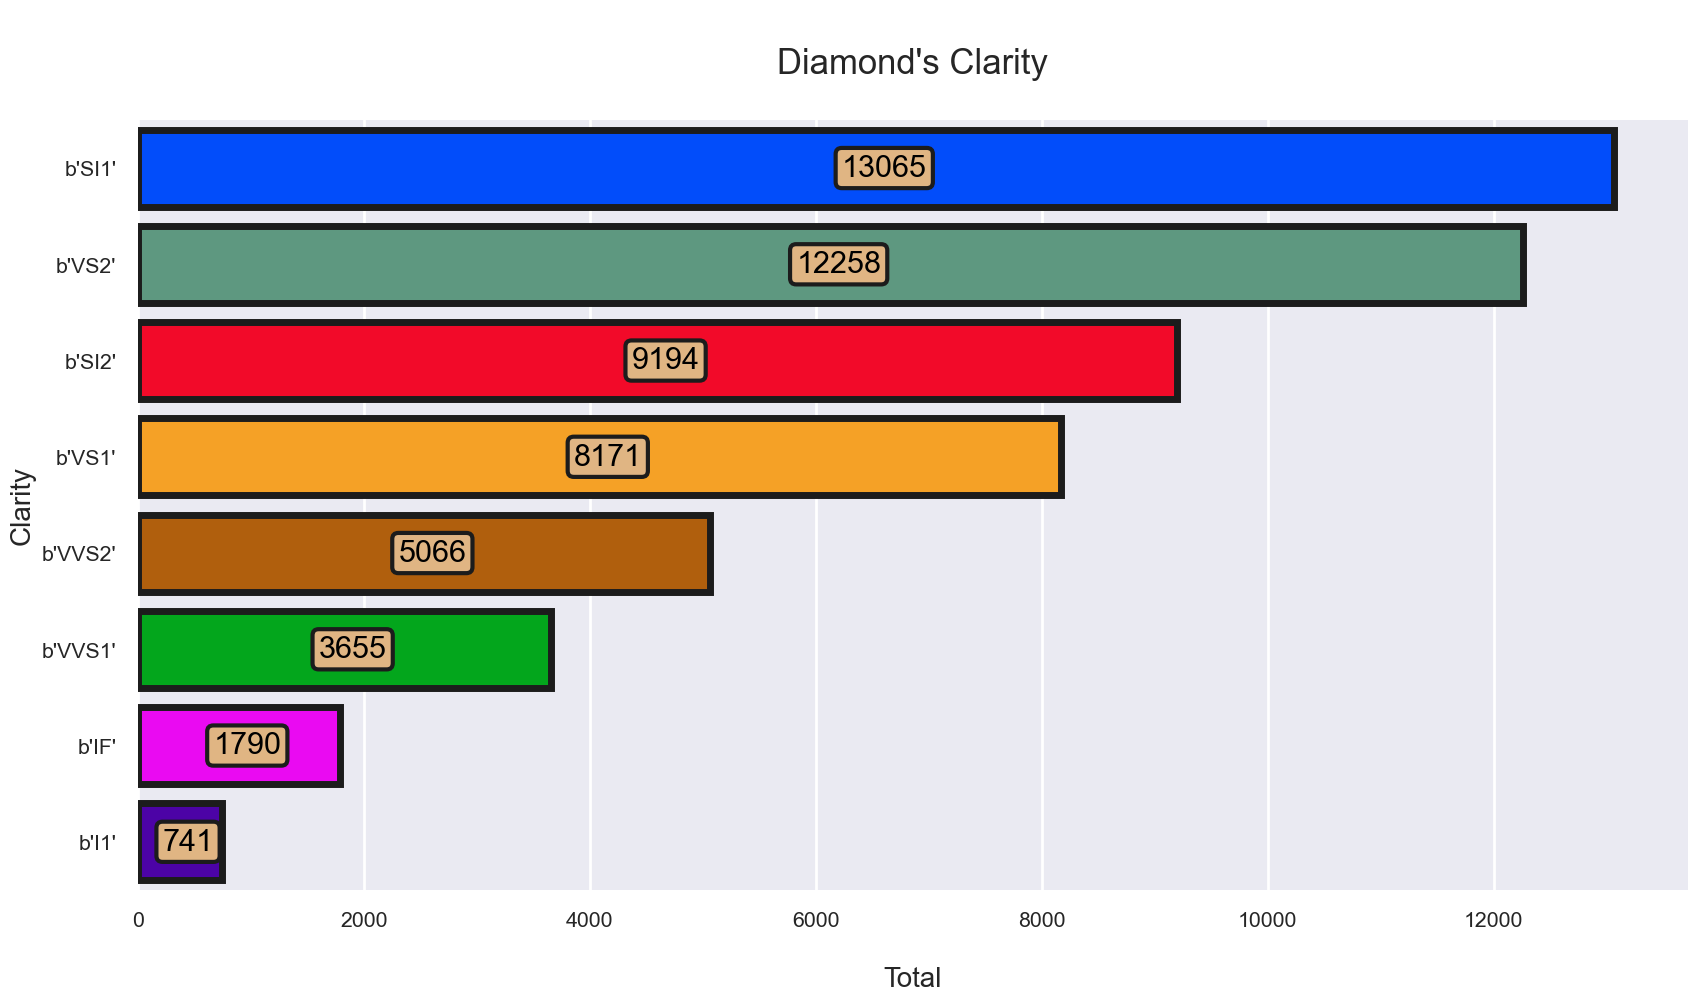

In [64]:

plt.subplots(figsize=(20, 10))

fig = plt.gcf()
fig.patch.set_facecolor('#ffffff')

p=sns.countplot(y=data["clarity"],order=data["clarity"].value_counts().index,palette=
                ["#024dfa","#5e9880","#f20a29","#f5a126","#b05f0d","#03a61c","#ea0af2","#4c03a6"],
                saturation=1, edgecolor = "#1c1c1c", linewidth = 5)

p.axes.set_title("\nDiamond's Clarity\n",fontsize=25)
p.axes.set_ylabel("Clarity",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=22,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})
    

sns.despine(left=True, bottom=True)
plt.show()

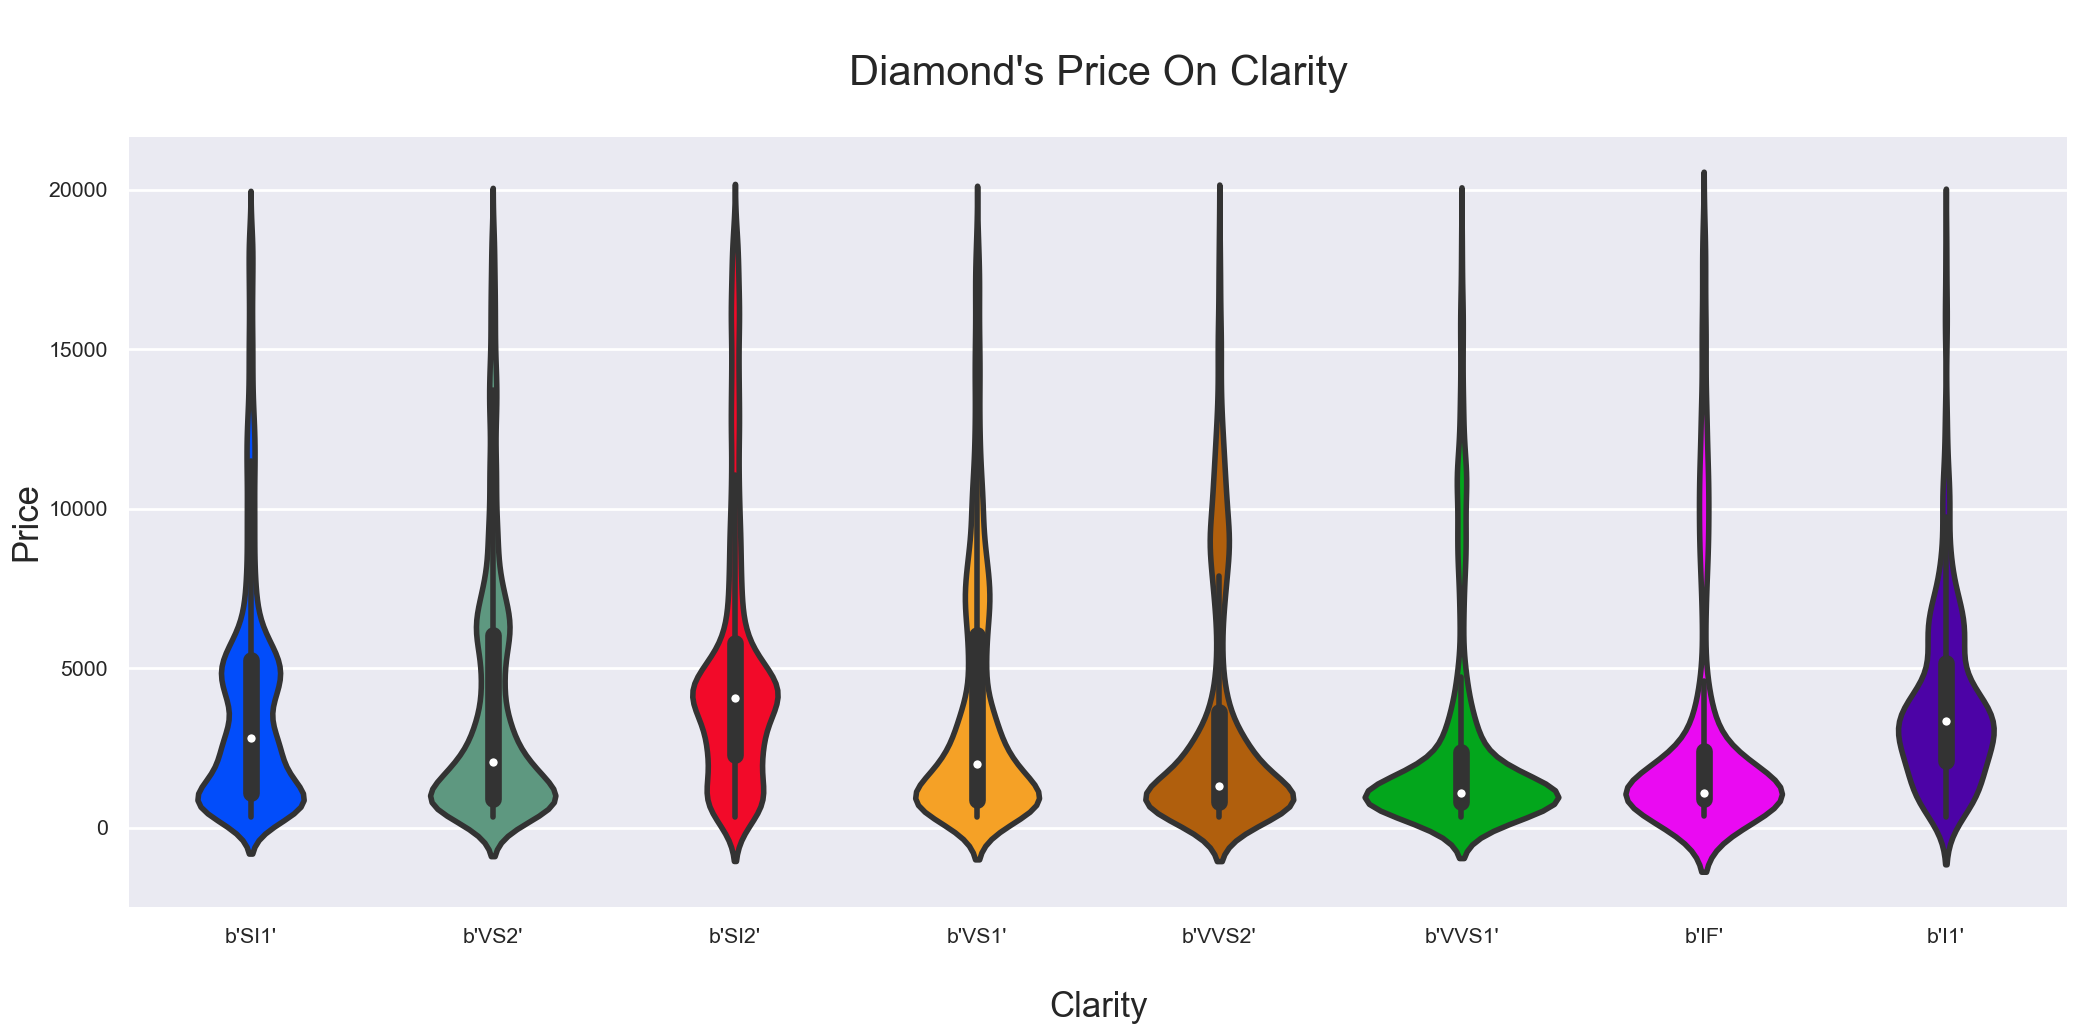

In [65]:

plt.subplots(figsize=(25, 10))

fig = plt.gcf()
fig.patch.set_facecolor('#ffffff')

p=sns.violinplot(x=data["clarity"],y=data["price"],order=data["clarity"].value_counts().index,palette=
                 ["#024dfa","#5e9880","#f20a29","#f5a126","#b05f0d","#03a61c","#ea0af2","#4c03a6"],
                 saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nDiamond's Price On Clarity\n",fontsize=30)
p.axes.set_xlabel("\nClarity",fontsize=25)
p.axes.set_ylabel("Price",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

<a id="10"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Diamond's Weight</p>

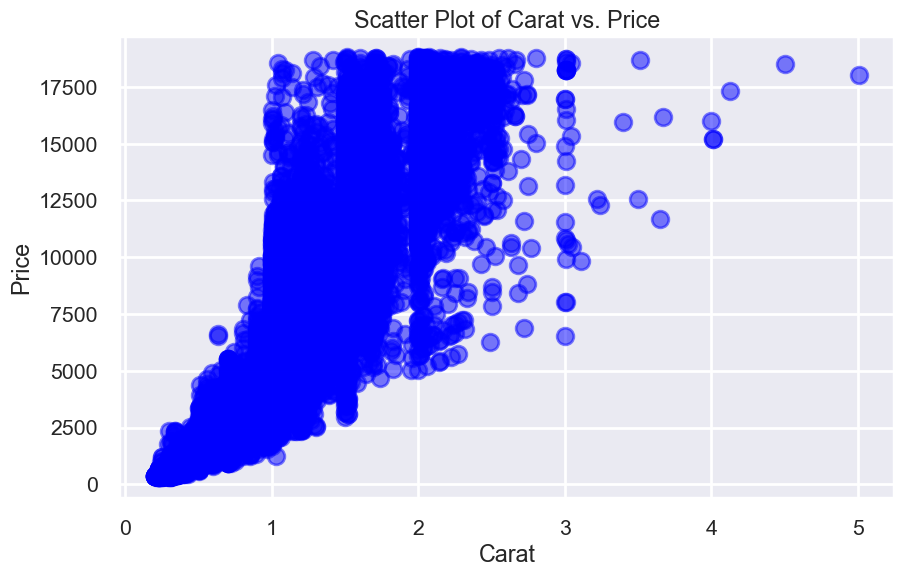

In [66]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with 'carat' and 'price' columns
plt.figure(figsize=(10, 6))
plt.scatter(data['carat'], data['price'], alpha=0.5, color='blue')
plt.title("Scatter Plot of Carat vs. Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.grid(True)
plt.show()


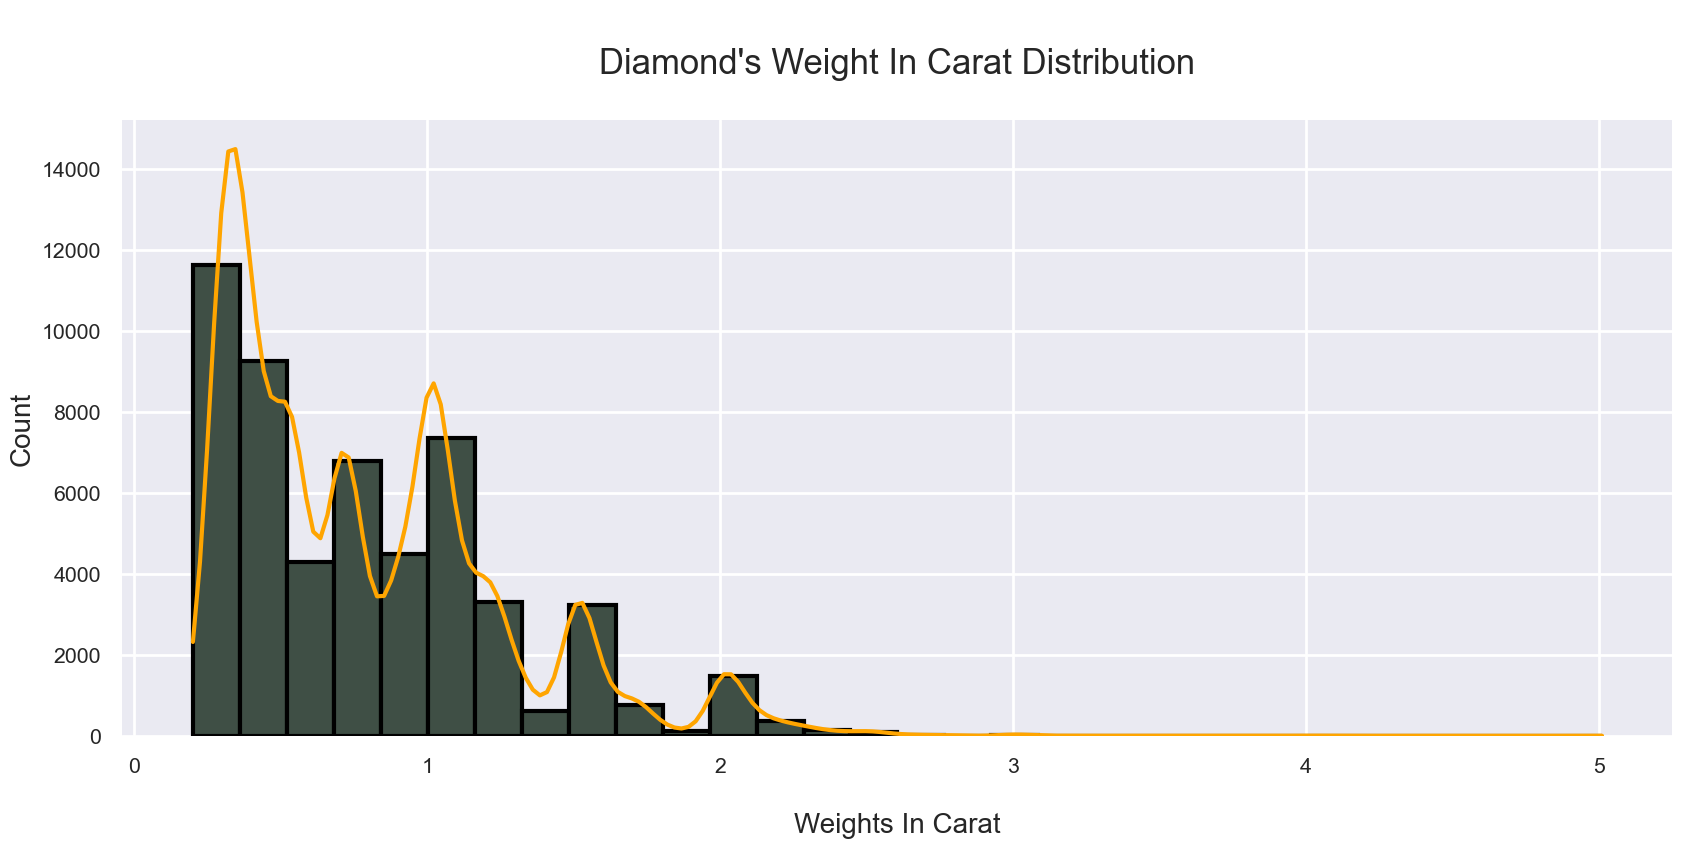

In [67]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["carat"],color="#3f4f45",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Weight In Carat Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nWeights In Carat",fontsize=20)
# plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

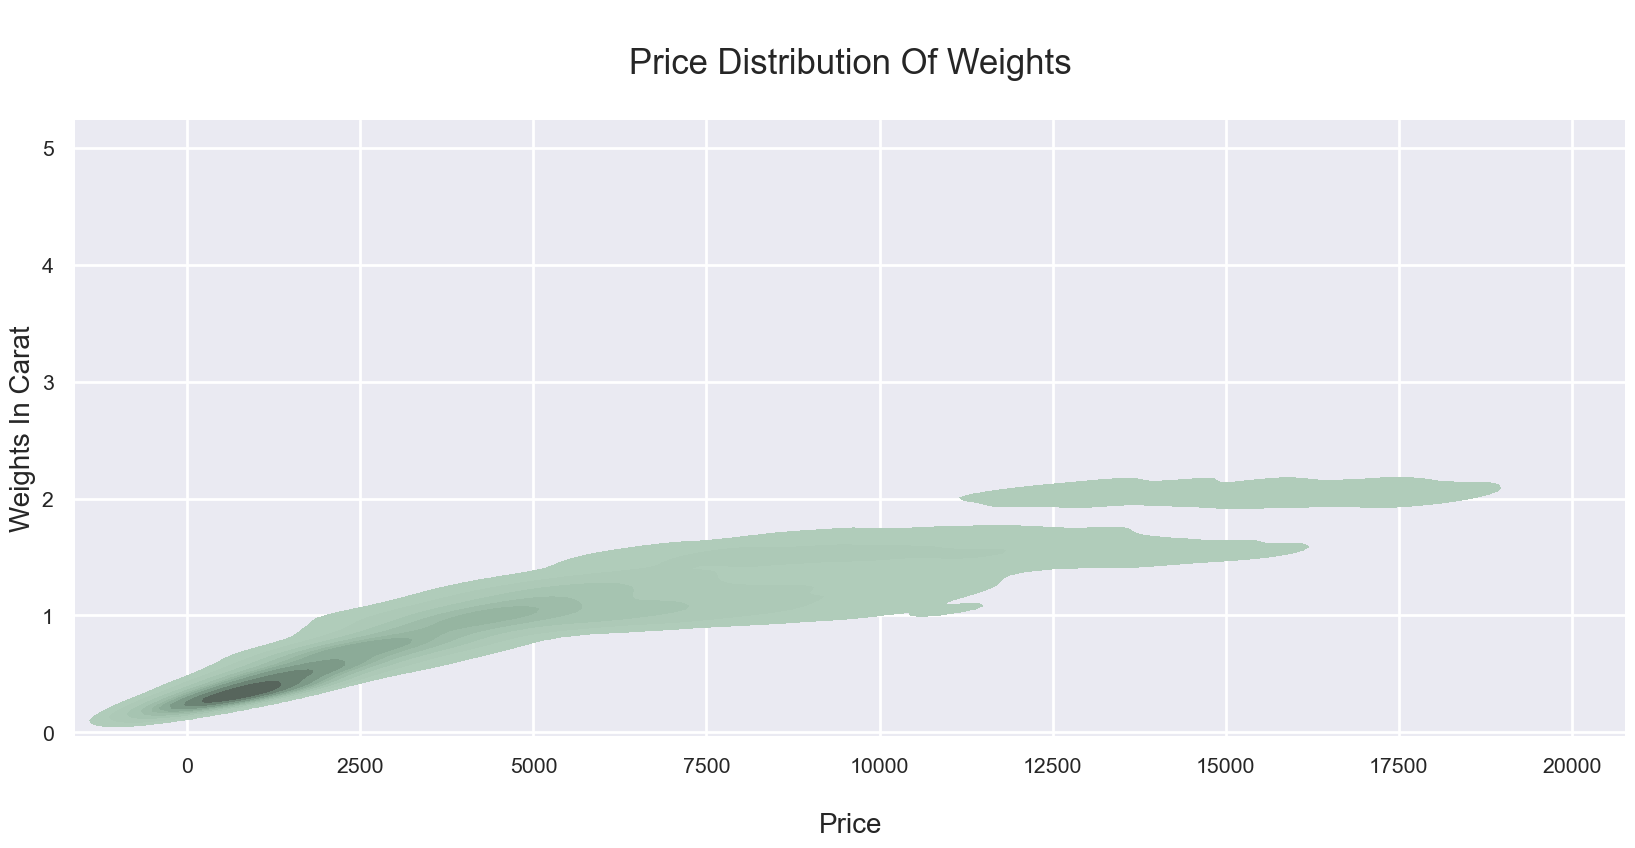

In [68]:
_, axes = plt.subplots(figsize=(20, 8))
sns.kdeplot(data=data, x="price", y="carat", edgecolor="#1c1c1c", fill=True, kind="kde", shade=True, height=10, color="#3f4f45")
axes.set_title("\nPrice Distribution Of Weights\n", fontsize=25)
axes.set_xlabel("\nPrice", fontsize=20)
axes.set_ylabel("Weights In Carat", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()


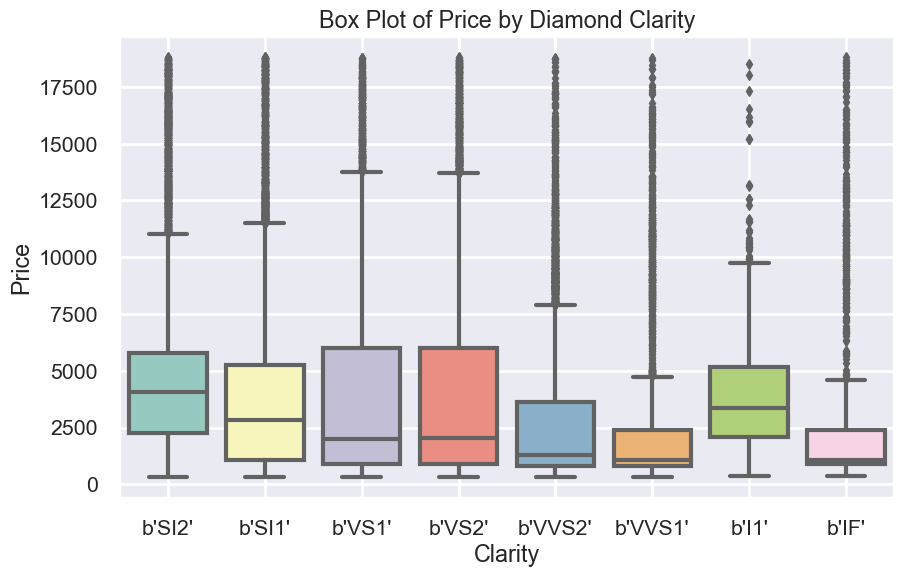

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with 'clarity' and 'price' columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=data, palette='Set3')
plt.title("Box Plot of Price by Diamond Clarity")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.grid(True)
plt.show()
#pending


<a id="11"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Diamond's Depth Percentage</p>


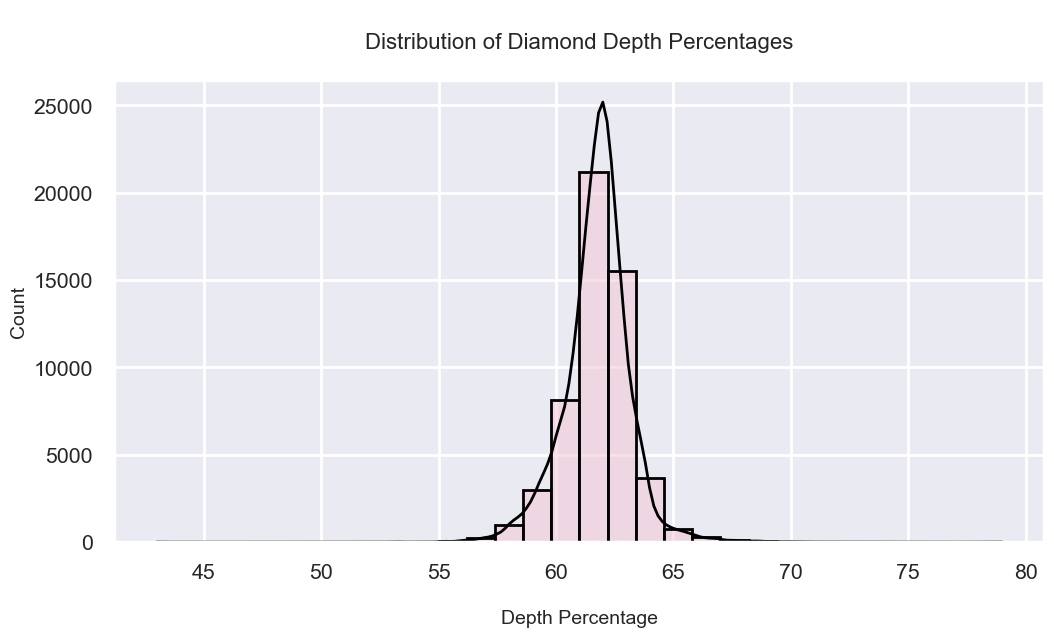

In [70]:
# KDE Plot - distribution of depth percentage
plt.figure(figsize=(12, 6))
p = sns.histplot(data=data, x="depth", bins=30, kde=True, color="#f2c4d6", edgecolor="black")

plt.title("\nDistribution of Diamond Depth Percentages\n", fontsize=16)
plt.xlabel("\nDepth Percentage", fontsize=14)
plt.ylabel("Count", fontsize=14)
p.axes.lines[0].set_color("black")
p.axes.lines[0].set_linewidth(2)

plt.show()


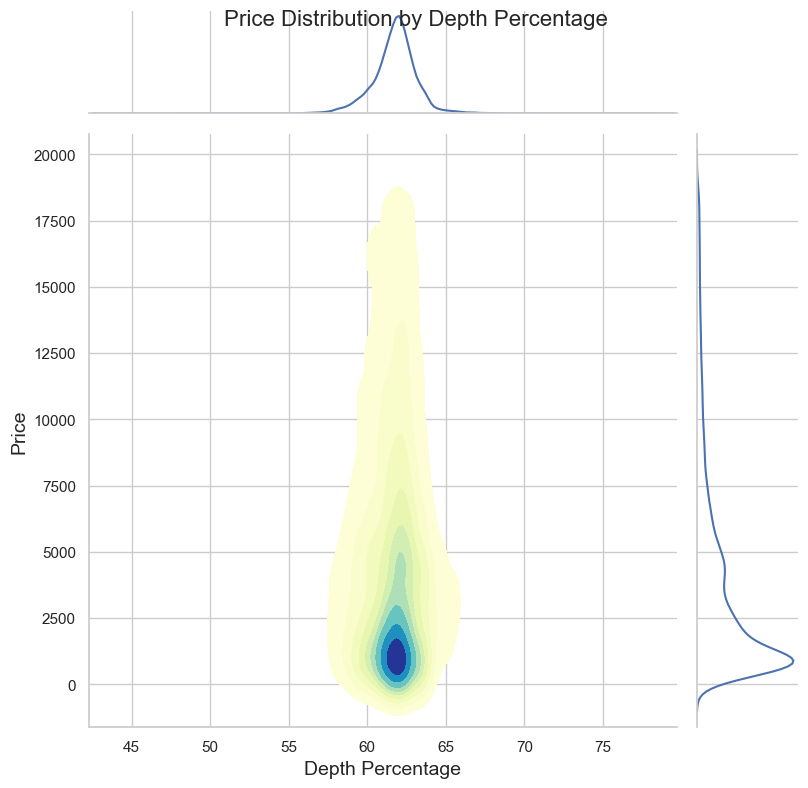

In [71]:
# jointplot to show the relationship between price and depth percentage

sns.set(style="whitegrid")
g = sns.jointplot(data=data, x="depth", y="price", kind="kde", cmap="YlGnBu", height=8, shade=True) 
# can change kind = "scatter" or kind = "reg"

# Customize plot labels and title
g.ax_joint.set_xlabel("Depth Percentage", fontsize=14)
g.ax_joint.set_ylabel("Price", fontsize=14)
g.fig.suptitle("Price Distribution by Depth Percentage", fontsize=16)

plt.show()



<a id="12"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Diamond's Table</p>


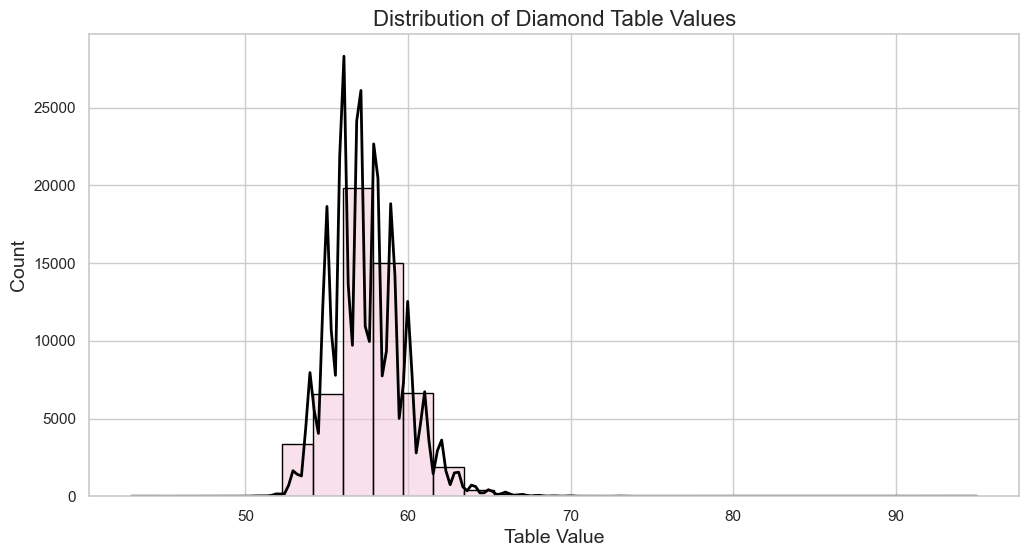

In [72]:
plt.figure(figsize=(12, 6))
p = sns.histplot(data=data, x="table", bins=28, kde=True, color="#f2c4d6", edgecolor="black")

# Customize plot labels and title
plt.title("Distribution of Diamond Table Values", fontsize=16)
plt.xlabel("Table Value", fontsize=14)
plt.ylabel("Count", fontsize=14)
p.axes.lines[0].set_color("black")
p.axes.lines[0].set_linewidth(2)

# Show the plot
plt.show()

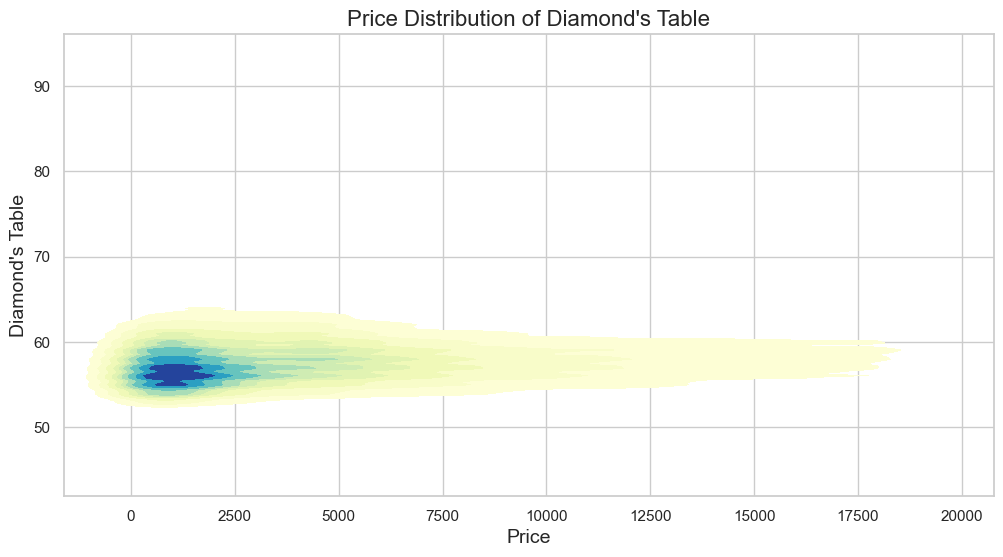

In [73]:
# KDE plot with price on the x-axis and table on the y-axis
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x="price", y="table", fill=True, cmap="YlGnBu", shade=True)

# Customize plot labels and title
plt.title("Price Distribution of Diamond's Table", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Diamond's Table", fontsize=14)

# Show the plot
plt.show()

<a id="13"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Outliers</p>

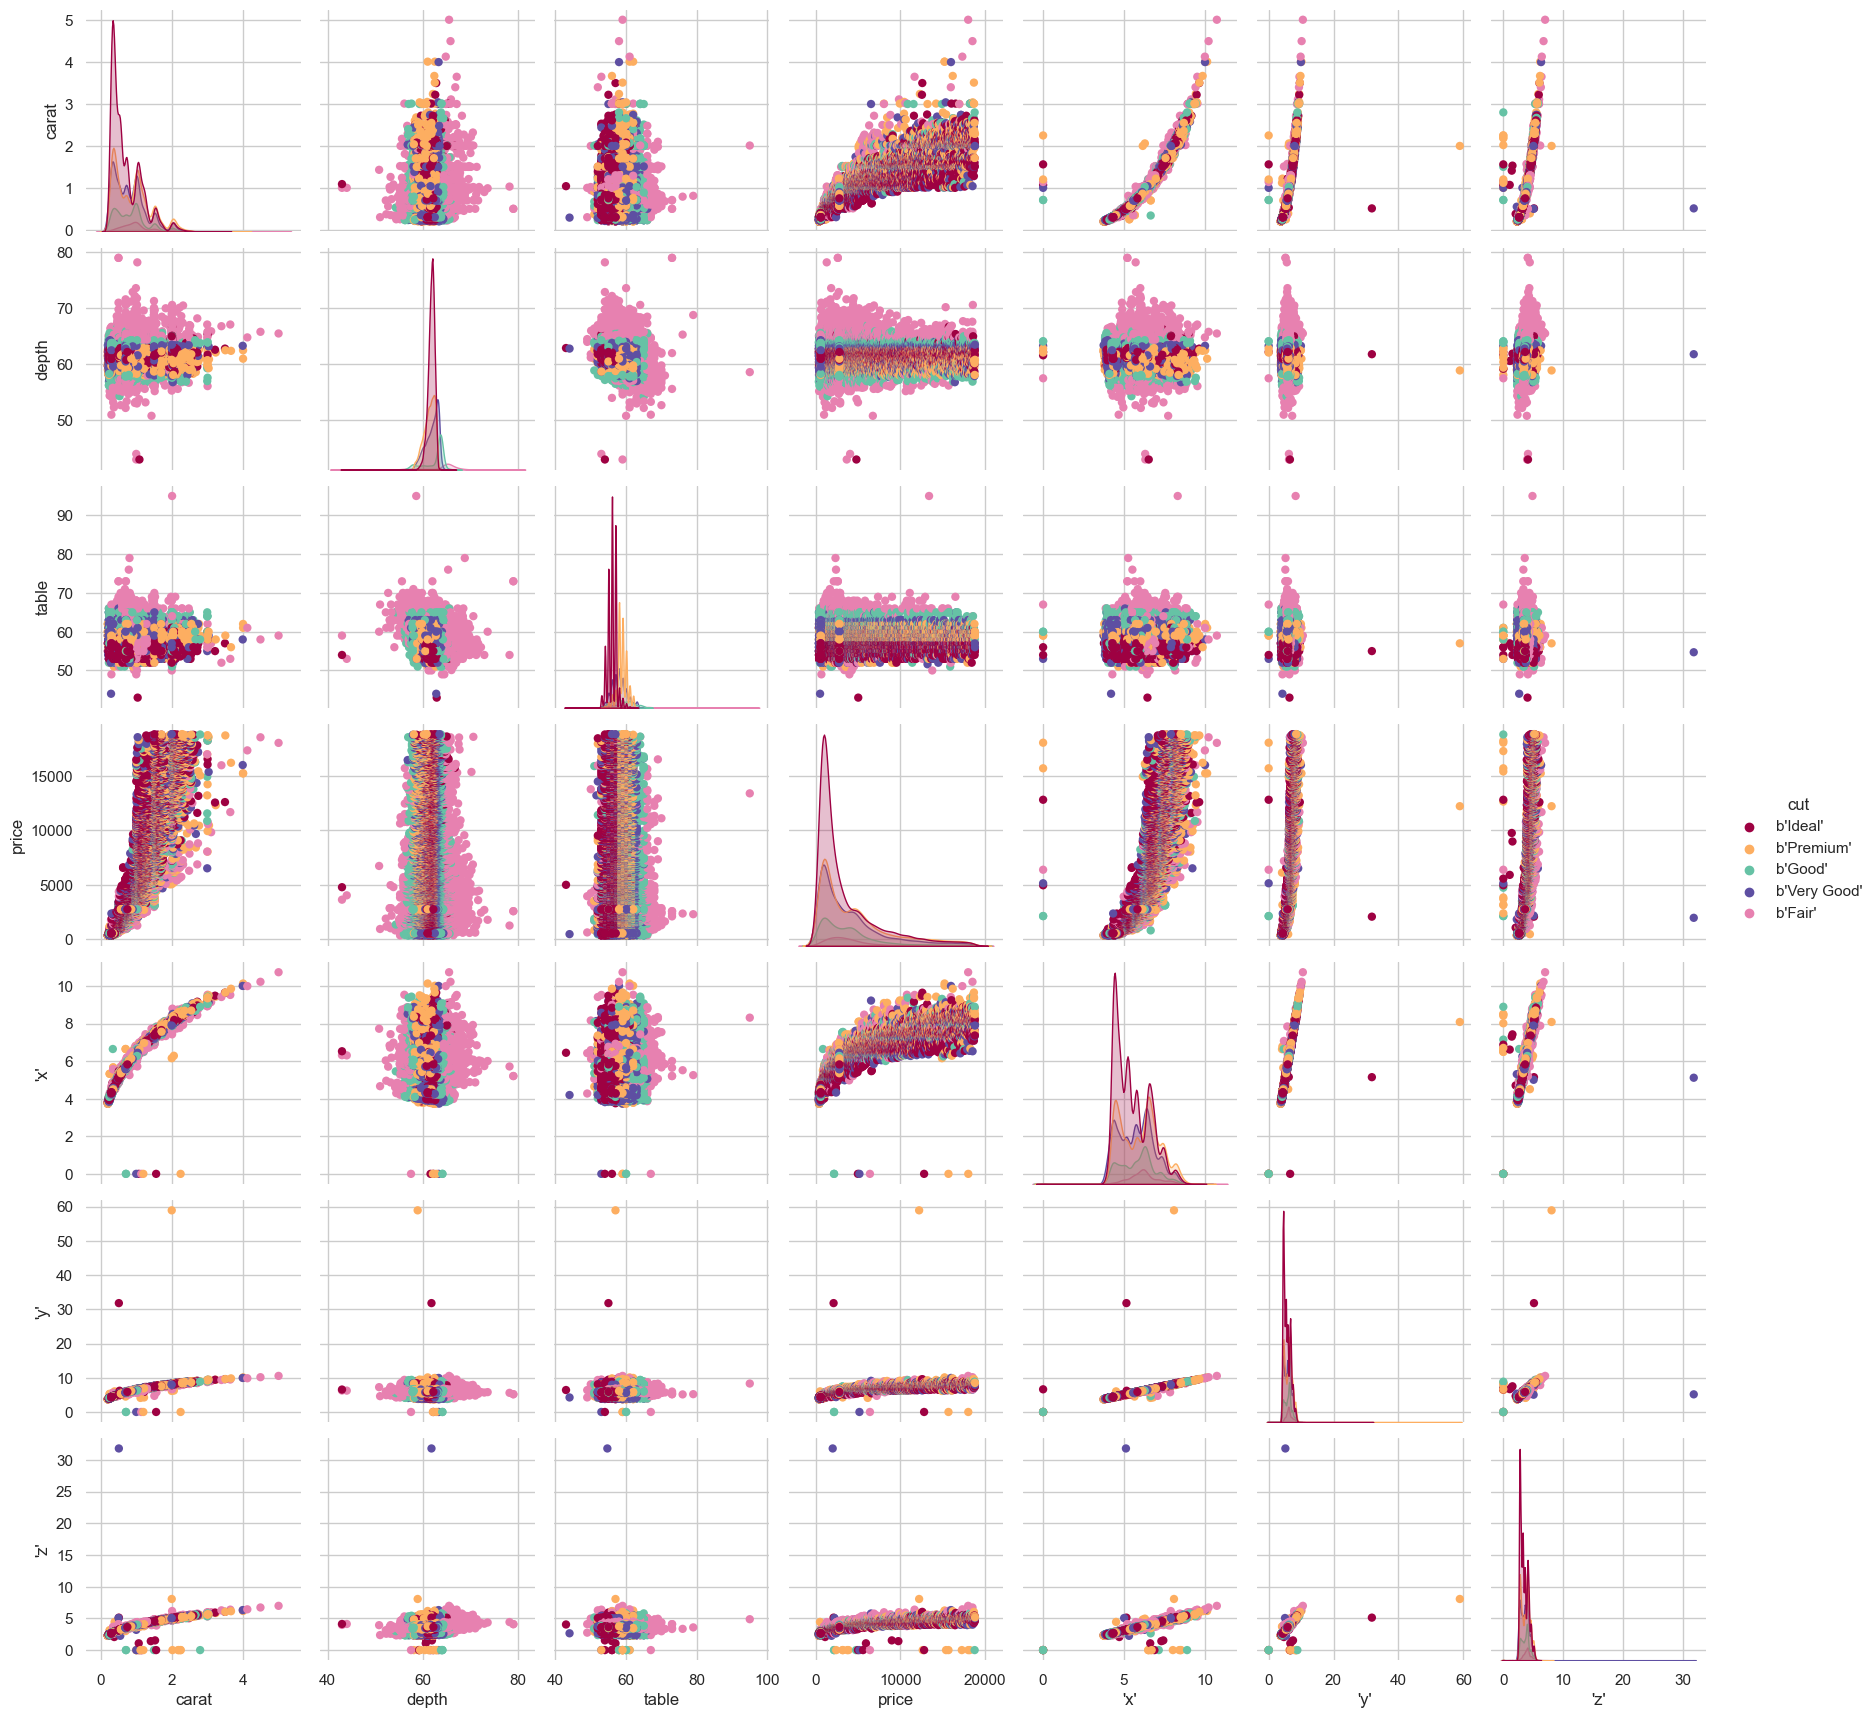

In [74]:
sns.pairplot(data=data,hue="cut",palette=["#9e0142","#fdae61","#66c2a5","#5e4fa2","#e781b0"],plot_kws=dict(linewidth=0))
sns.despine(left=True, bottom=True)
plt.show()

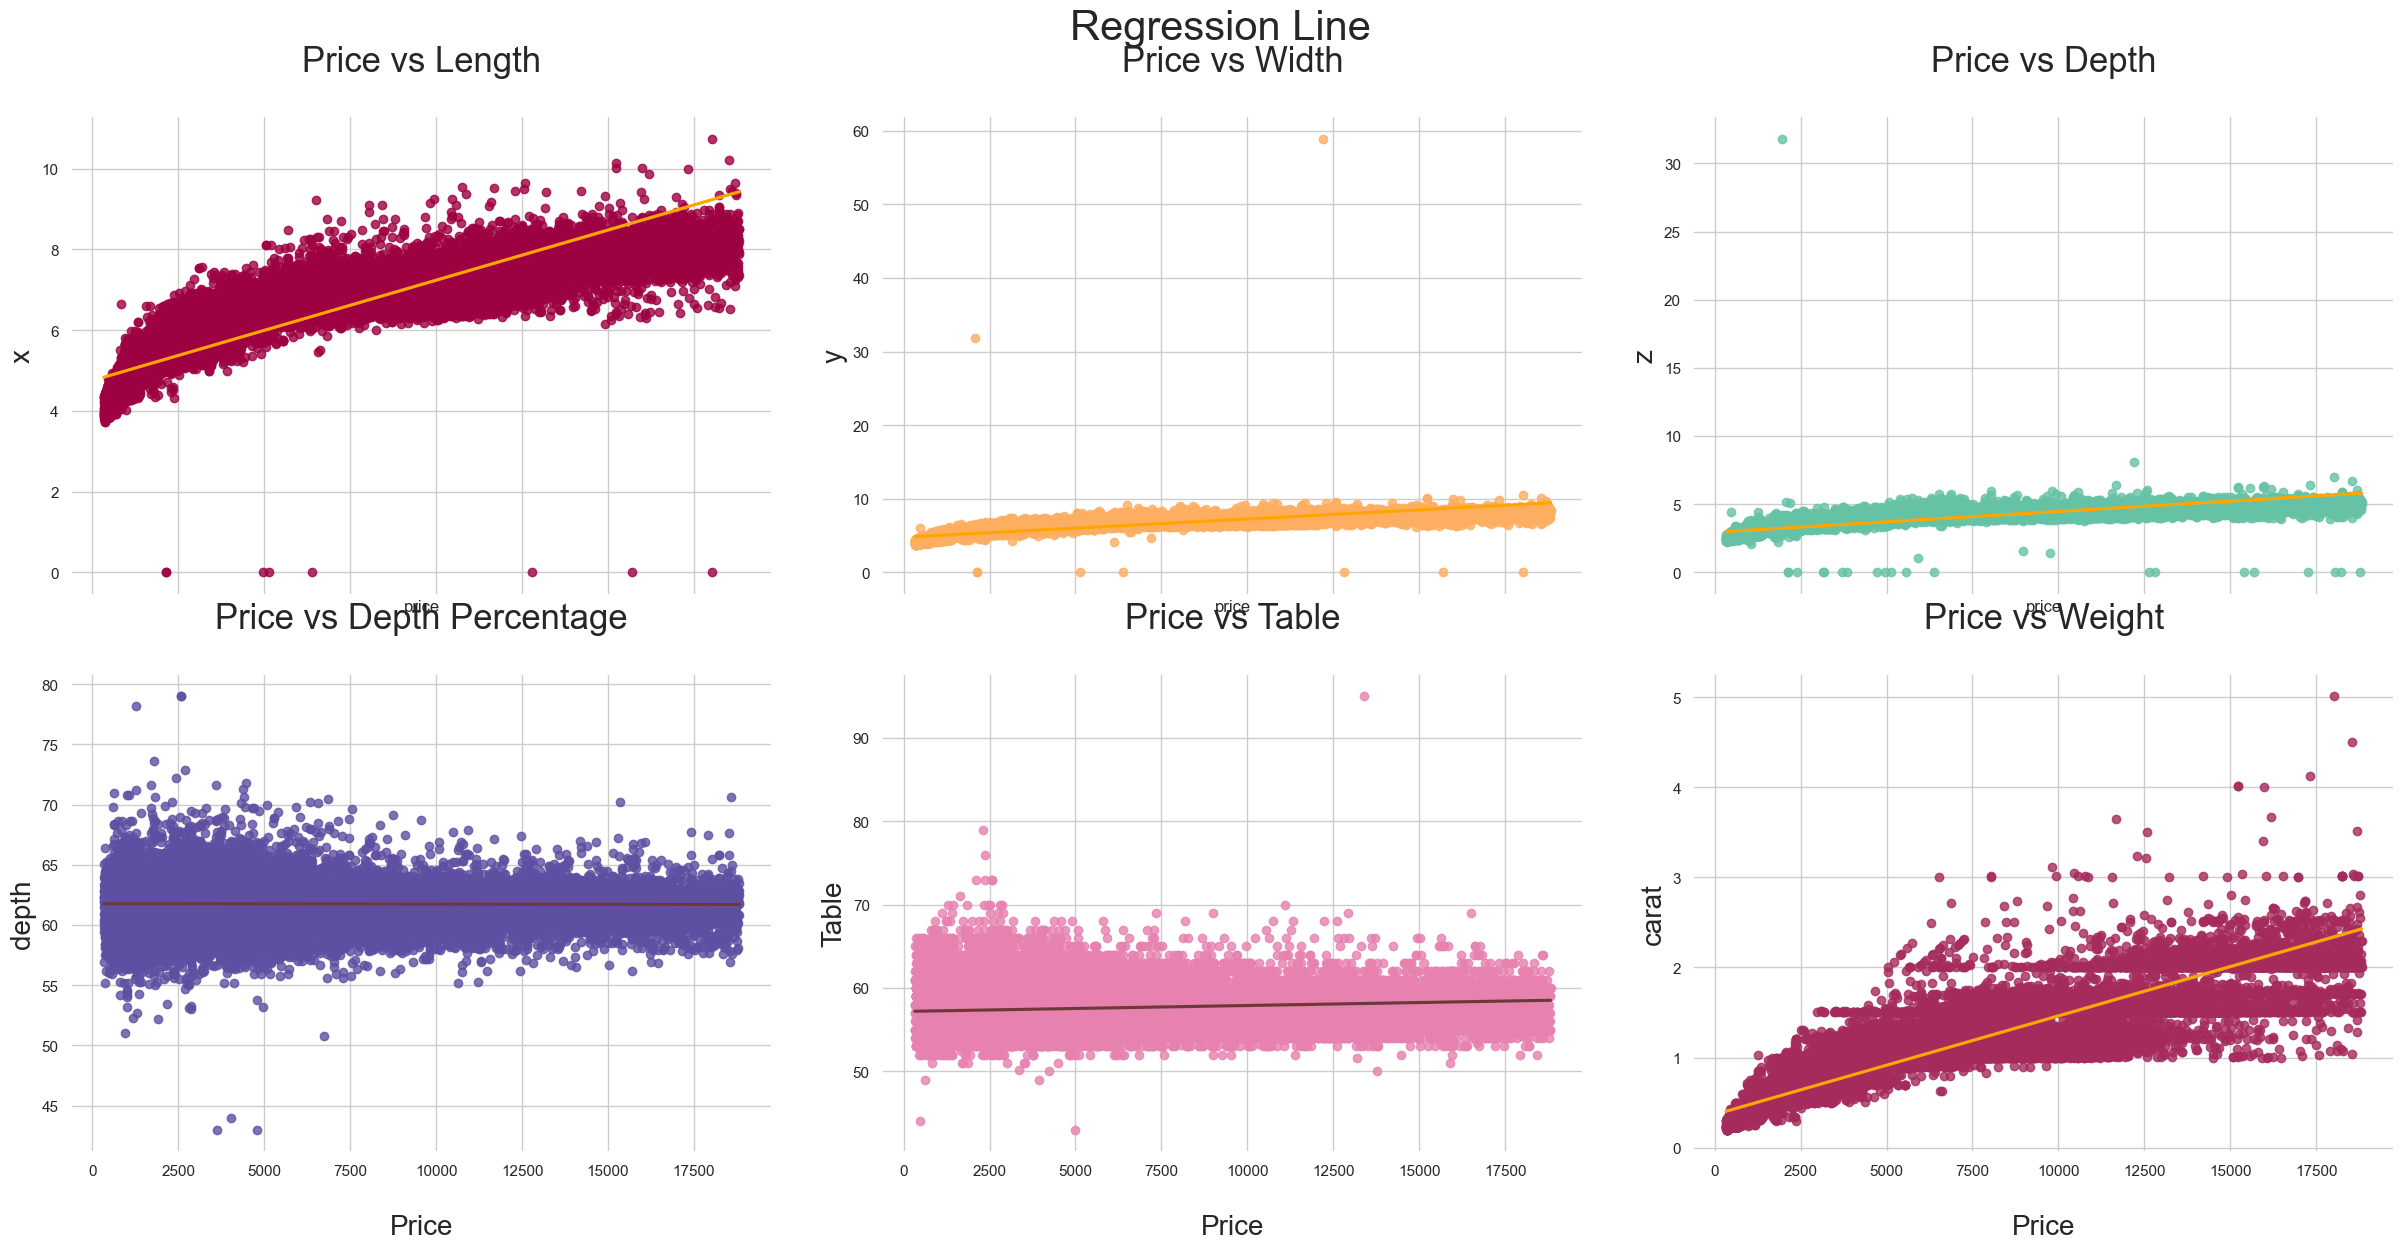

In [75]:
_, axs = plt.subplots(2,3,figsize=(25,12),sharex=True)
plt.tight_layout(pad=4.0)

sns.regplot(x="price", y="'x'", data=data, ax=axs[0,0], color="#9e0142", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,0].set_title("Price vs Length\n",fontsize=25)
axs[0,0].set_ylabel("x",fontsize=20)

sns.regplot(x="price", y="'y'", data=data, ax=axs[0,1], color="#fdae61", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,1].set_title("Price vs Width\n",fontsize=25)
axs[0,1].set_ylabel("y",fontsize=20)

sns.regplot(x="price", y="'z'", data=data, ax=axs[0,2], color="#66c2a5", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,2].set_title("Price vs Depth\n",fontsize=25)
axs[0,2].set_ylabel("z",fontsize=20)

sns.regplot(x="price", y="depth", data=data, ax=axs[1,0], color="#5e4fa2", fit_reg=True, line_kws=dict(color= "#6c3938"))
axs[1,0].set_title("Price vs Depth Percentage\n",fontsize=25)
axs[1,0].set_xlabel("\nPrice",fontsize=20)
axs[1,0].set_ylabel("depth",fontsize=20)

sns.regplot(x="price", y="table", data=data, ax=axs[1,1], color="#e781b0", fit_reg=True, line_kws=dict(color= "#6c3938"))
axs[1,1].set_title("Price vs Table\n",fontsize=25)
axs[1,1].set_xlabel("\nPrice",fontsize=20)
axs[1,1].set_ylabel("Table",fontsize=20)

sns.regplot(x="price", y="carat", data=data, ax=axs[1,2], color="#a52b5d", fit_reg=True, line_kws=dict(color= "orange"))
axs[1,2].set_title("Price vs Weight\n",fontsize=25)
axs[1,2].set_xlabel("\nPrice",fontsize=20)
axs[1,2].set_ylabel("carat",fontsize=20)

plt.suptitle("Regression Line\n\n",fontsize=30, y=1.03)
sns.despine(left=True, bottom=True)
plt.show()

After dropping outliers, let's have a look on the pairwise relationships :


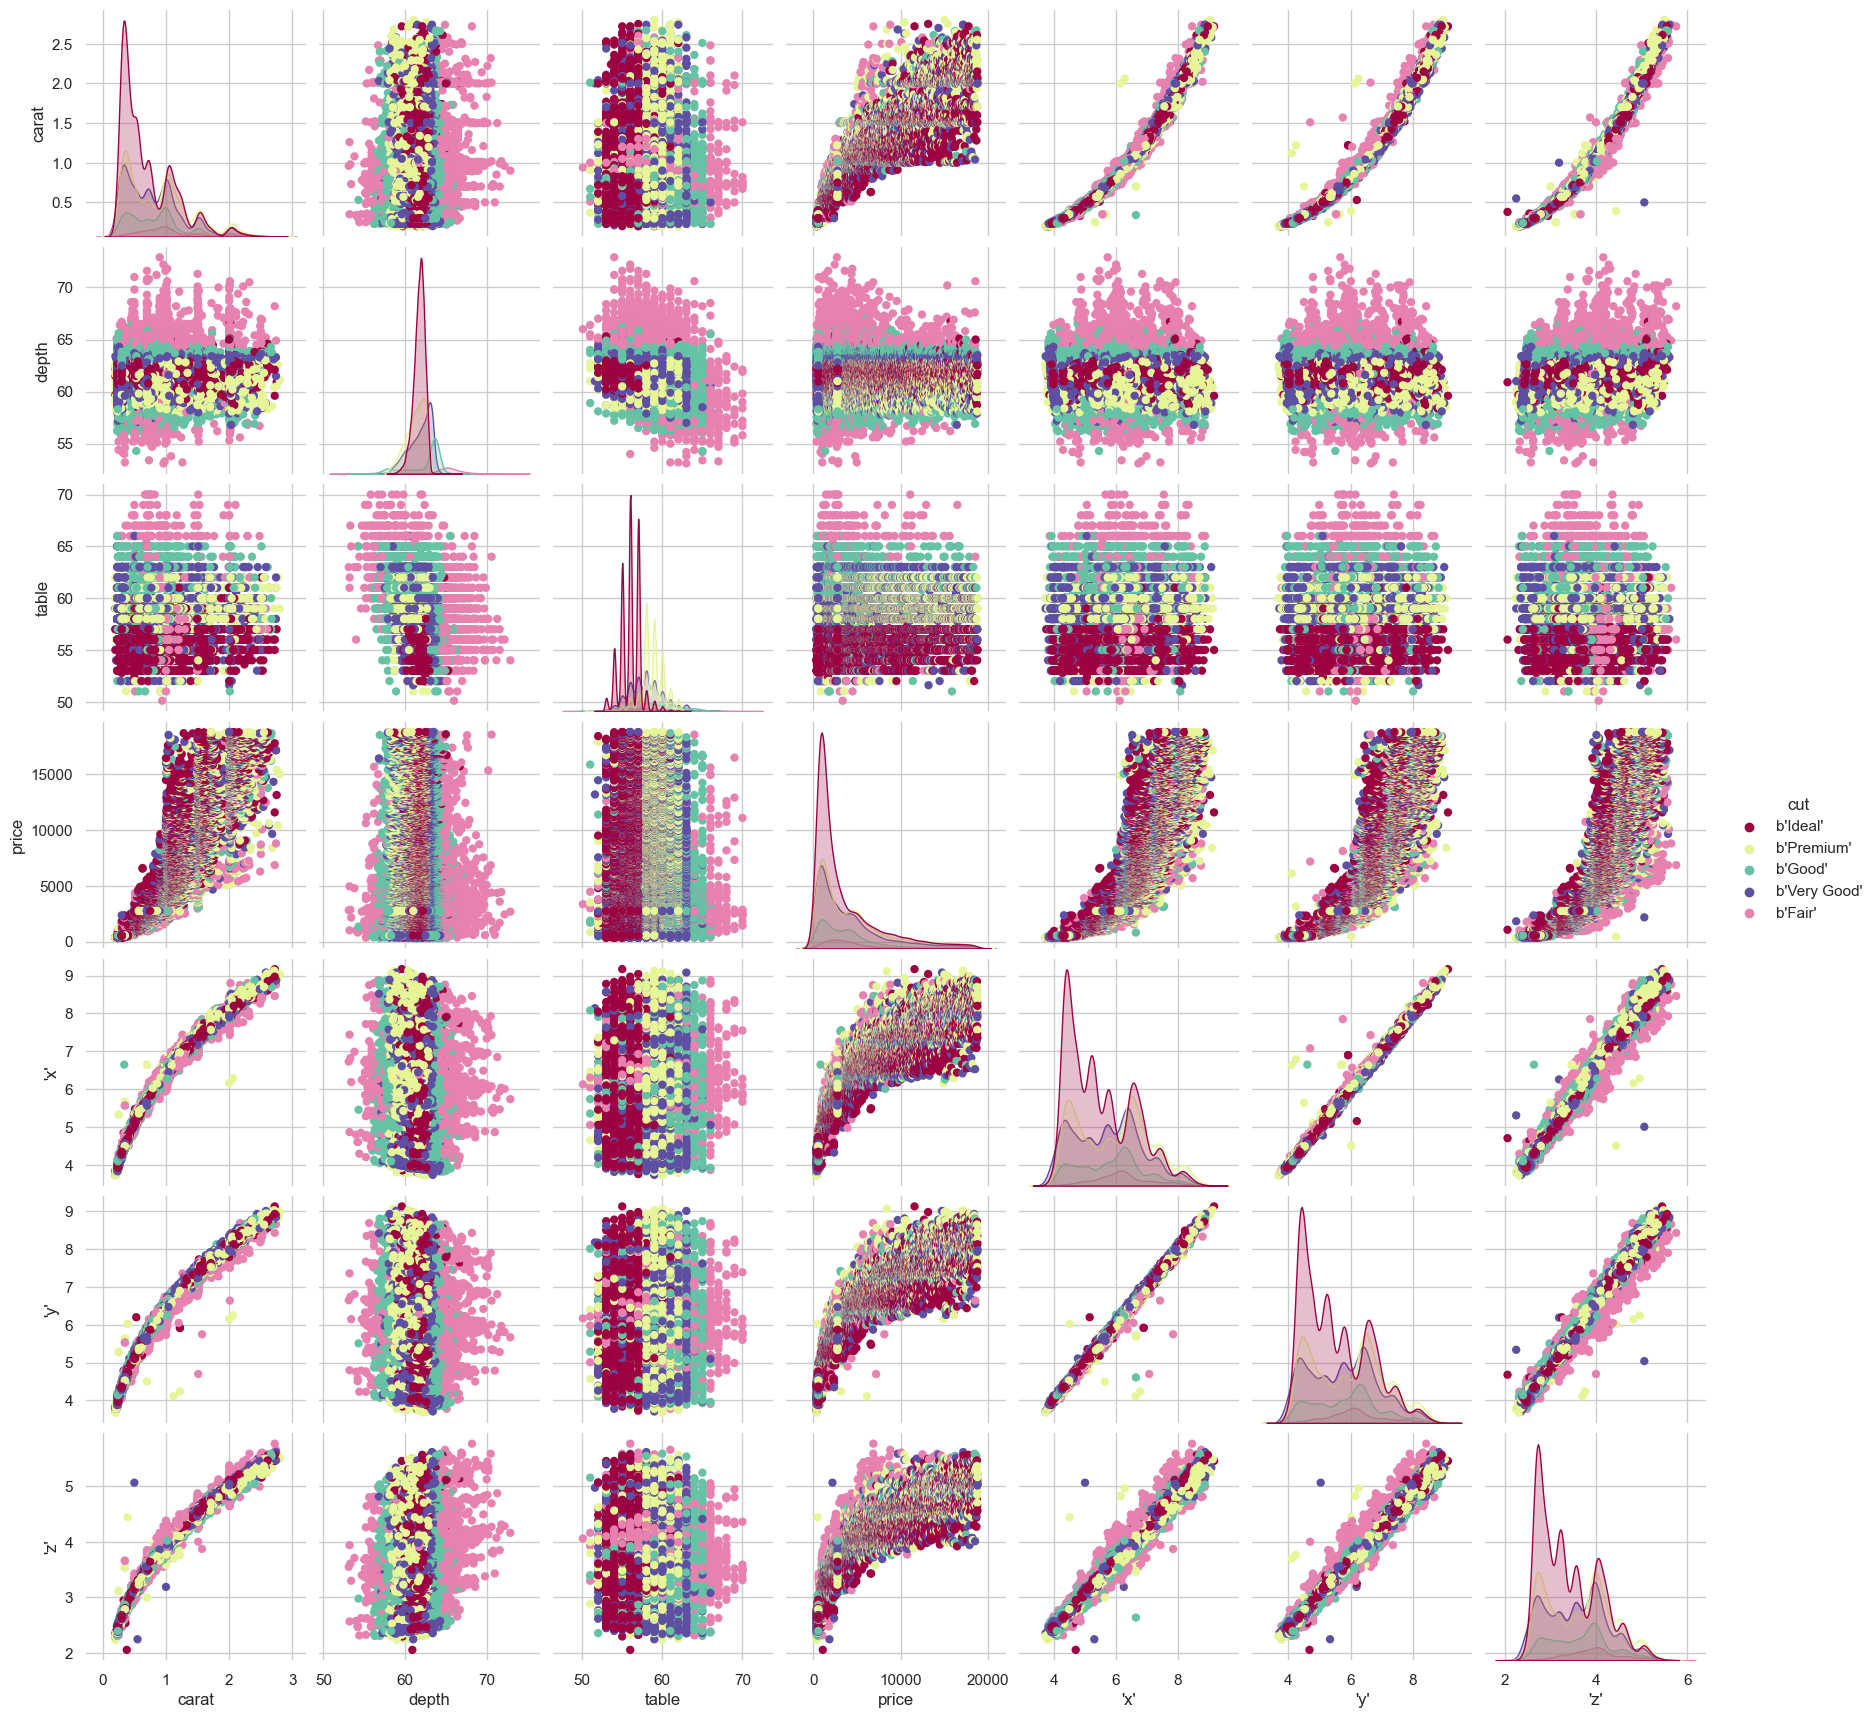

In [76]:
data = data[(data["'x'"]<10)&(data["'x'"]>3)]
data = data[(data["'y'"]<13)&(data["'y'"]>2)]
data = data[(data["'z'"]<6)&(data["'z'"]>2)]
data = data[(data["depth"]<73)&(data["depth"]>53)]
data = data[(data["table"]<71)&(data["table"]>50)]
data = data[(data["carat"]<3)]

print(f"After dropping outliers, let's have a look on the pairwise relationships :")

sns.pairplot(data=data,hue="cut",palette=["#9e0142","#e6f598","#66c2a5","#5e4fa2","#e781b0"],plot_kws=dict(linewidth=0))
sns.despine(left=True, bottom=True)
plt.show()


<a id="14"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Correlation</p>

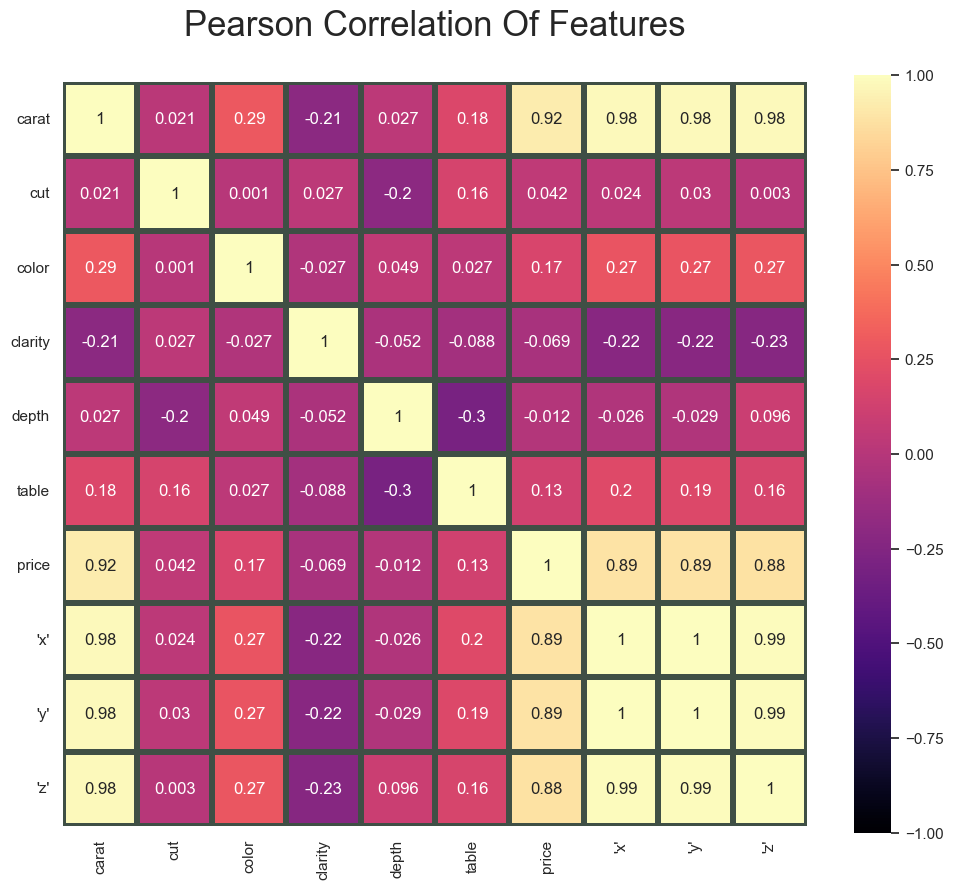

In [77]:
catcol = ["color","clarity","cut"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(12, 12))

sns.heatmap(data.corr(), cmap = "magma", square=True, cbar_kws=dict(shrink =.82), annot=True, vmin=-1, 
            vmax=1, linewidths=3,linecolor='#3f4f45',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

<a id="14"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Normalisation</p>

In [78]:
# Specify the columns to be scaled (exclude non-numeric columns)
numeric_columns = ['carat', "'x'", "'y'", "'z'"]
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print(data)

          carat  cut  color  clarity  depth  table   price       'x'  \
0      0.011538    2      1        3   61.5   55.0   326.0  0.040441   
1      0.003846    3      1        2   59.8   61.0   326.0  0.029412   
2      0.011538    1      1        4   56.9   65.0   327.0  0.058824   
3      0.034615    3      5        5   62.4   58.0   334.0  0.086397   
4      0.042308    1      6        3   63.3   58.0   335.0  0.112132   
...         ...  ...    ...      ...    ...    ...     ...       ...   
53935  0.200000    2      0        2   60.8   57.0  2757.0  0.371324   
53936  0.200000    1      0        2   63.1   55.0  2757.0  0.360294   
53937  0.192308    4      0        2   62.8   60.0  2757.0  0.354779   
53938  0.253846    3      4        3   61.0   58.0  2757.0  0.444853   
53939  0.211538    2      0        3   62.2   55.0  2757.0  0.386029   

            'y'       'z'  
0      0.055046  0.100000  
1      0.029358  0.067568  
2      0.071560  0.067568  
3      0.100917  0.1540

<a id="14"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Spliting Data</p>

In [79]:
# Drop the columns you don't need
columns_to_drop = ['cut','depth', 'table']
data = data.drop(columns=columns_to_drop)

# Handle missing values (NaN) if there are any
# For example, you can fill NaN values with the mean of each column
data.fillna(data.mean(), inplace=True)

print(data)
# Drop the target variable from the feature dataset
X = data.drop(columns='price')
# Assuming 'price' is your target variable
y = data["price"]

# Standardize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


          carat  color  clarity   price       'x'       'y'       'z'
0      0.011538      1        3   326.0  0.040441  0.055046  0.100000
1      0.003846      1        2   326.0  0.029412  0.029358  0.067568
2      0.011538      1        4   327.0  0.058824  0.071560  0.067568
3      0.034615      5        5   334.0  0.086397  0.100917  0.154054
4      0.042308      6        3   335.0  0.112132  0.122936  0.186486
...         ...    ...      ...     ...       ...       ...       ...
53935  0.200000      0        2  2757.0  0.371324  0.381651  0.389189
53936  0.200000      0        2  2757.0  0.360294  0.379817  0.418919
53937  0.192308      0        2  2757.0  0.354779  0.366972  0.405405
53938  0.253846      4        3  2757.0  0.444853  0.447706  0.454054
53939  0.211538      0        3  2757.0  0.386029  0.401835  0.427027

[53848 rows x 7 columns]


<a id="15"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Model Creation & Performance Evaluation</p>

## Random Forest


In [80]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)


print("After Performing Random Forest Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,rf_pred)}")
rfr1 =1-(1-metrics.r2_score(y_test,rf_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,rf_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,rf_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,rf_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,rf_pred,squared = False)}")



After Performing Random Forest Regression,

R Squared Value: 0.97999565032416
Adjusted R Squared Value: 0.9799844985915525
Mean Absolute Error: 279.0043858049255
Mean Squared Error: 305586.49988765526
Root Mean Squared Error: 552.7987878854794


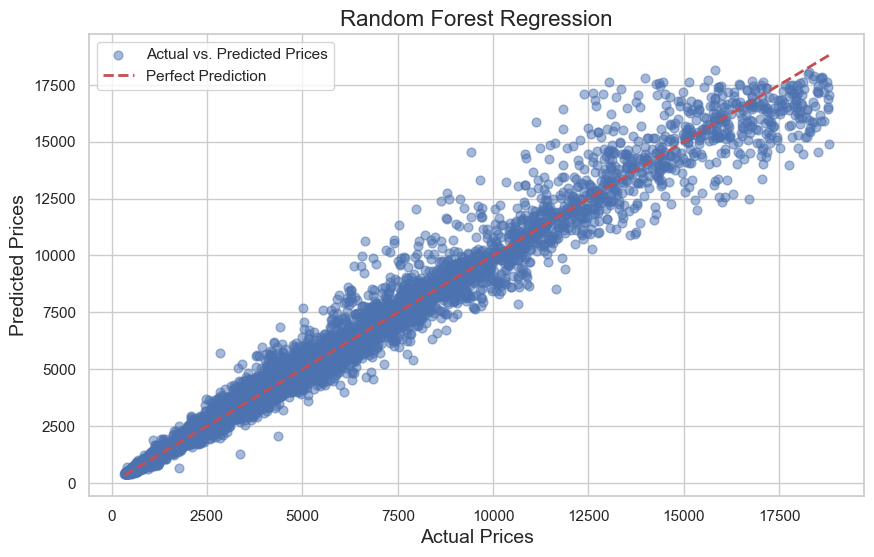

In [81]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5, color='b',s=40, label='Actual vs. Predicted Prices')
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.title('Random Forest Regression', fontsize=16)
plt.legend()
plt.grid(True)

# Add a diagonal line (perfect prediction line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')

# Show the plot
plt.legend()
plt.show()



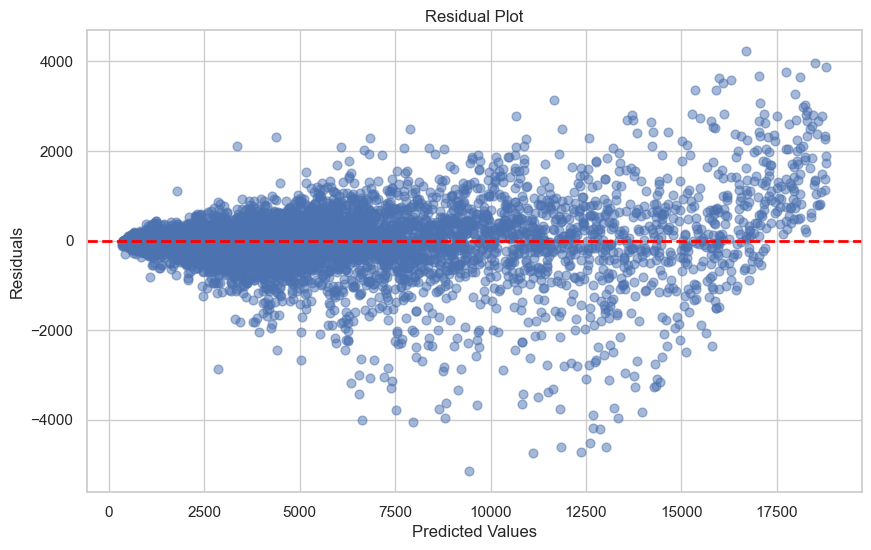

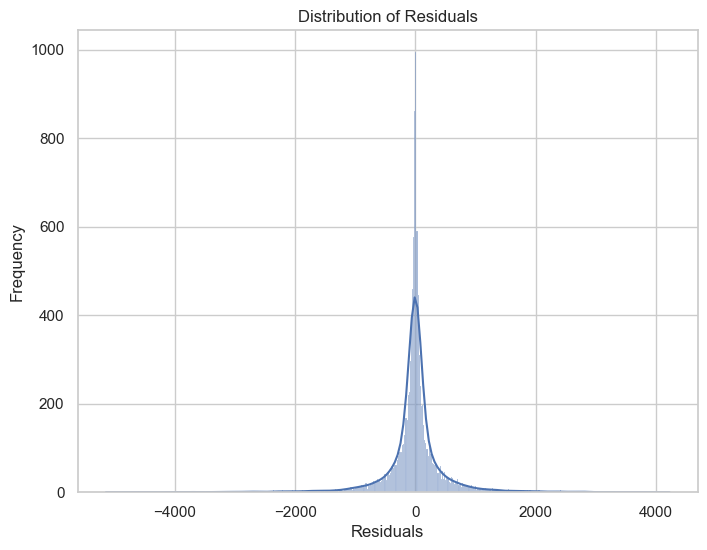

In [82]:
# Calculate the residuals
residuals = y_test - rf_pred

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='b', s=40)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.show()


# Plot 2: Distribution of Residuals (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(y_test - rf_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


## K-Neighbours Regression

In [83]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_test)

print("After Performing K-Neighbors Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,kn_pred)}")
knr2 = 1-(1-metrics.r2_score(y_test,kn_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,kn_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,kn_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,kn_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,kn_pred,squared = False)}")



After Performing K-Neighbors Regression,

R Squared Value: 0.9787394681375062
Adjusted R Squared Value: 0.9787276161268053
Mean Absolute Error: 289.93888579387186
Mean Squared Error: 324775.9423769731
Root Mean Squared Error: 569.891167133667


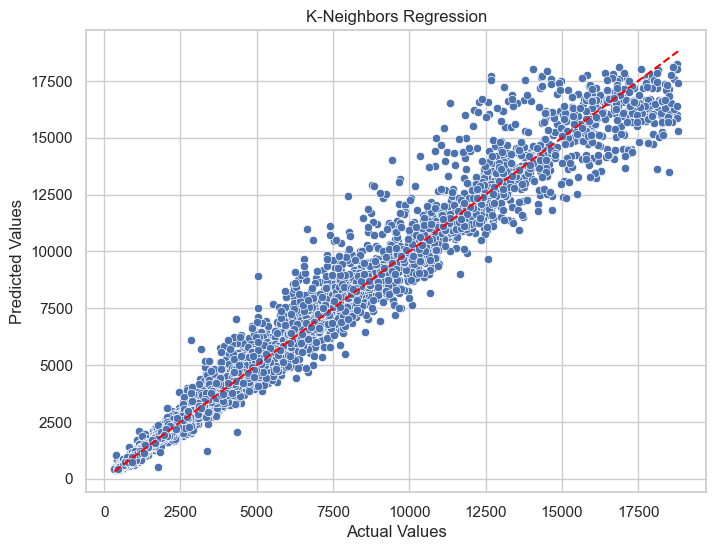

In [84]:
# Plot 3: Actual vs. Predicted Values (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=kn_pred, color='b')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Neighbors Regression')
plt.grid(True)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

# Plot 4: Regression Line (Regression Plot)
# plt.figure(figsize=(8, 6))
# sns.regplot(x=y_test, y=kn_pred, line_kws={"color": "yellow"})  
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Regression Line')
# plt.grid(True)
# plt.show()
# sns.set()
# plt.close()


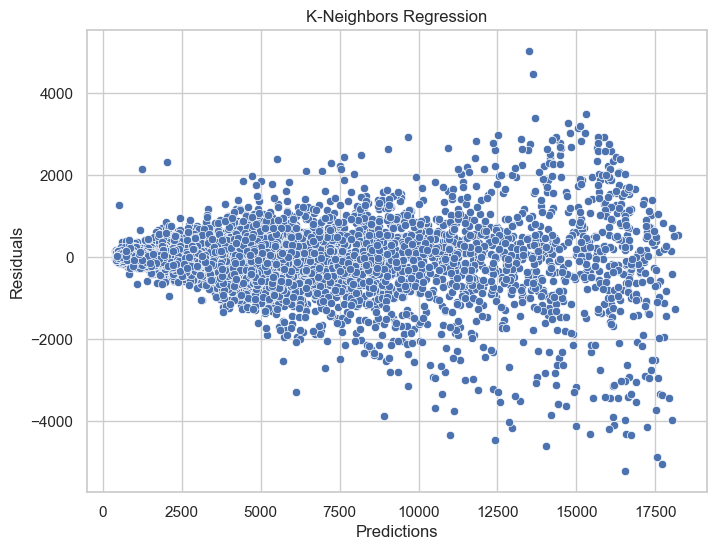

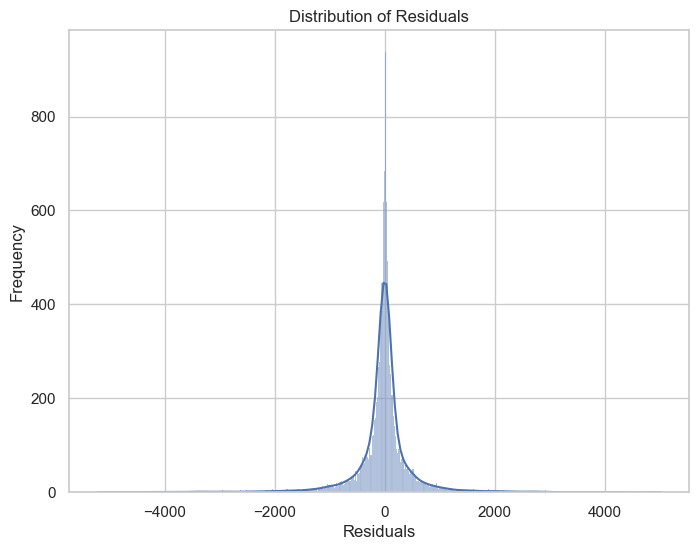

In [85]:
# sns.set(style="whitegrid")
# Plot 1: Residuals vs. Predictions (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=kn_pred, y=y_test - kn_pred)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('K-Neighbors Regression')
plt.grid(True)
plt.show()

# Plot 2: Distribution of Residuals (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(y_test - kn_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

## Decision Tree

In [86]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
DT_pred = dt.predict(x_test)

print("After Performing Decision Tree Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,DT_pred)}")
dtr=1-(1-metrics.r2_score(y_test,DT_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,DT_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,DT_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,DT_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,DT_pred,squared = False)}")



After Performing Decision Tree Regression,

R Squared Value: 0.9632617594379915
Adjusted R Squared Value: 0.9632412791403634
Mean Absolute Error: 366.3778396781182
Mean Squared Error: 561213.4624368101
Root Mean Squared Error: 749.1418173061828


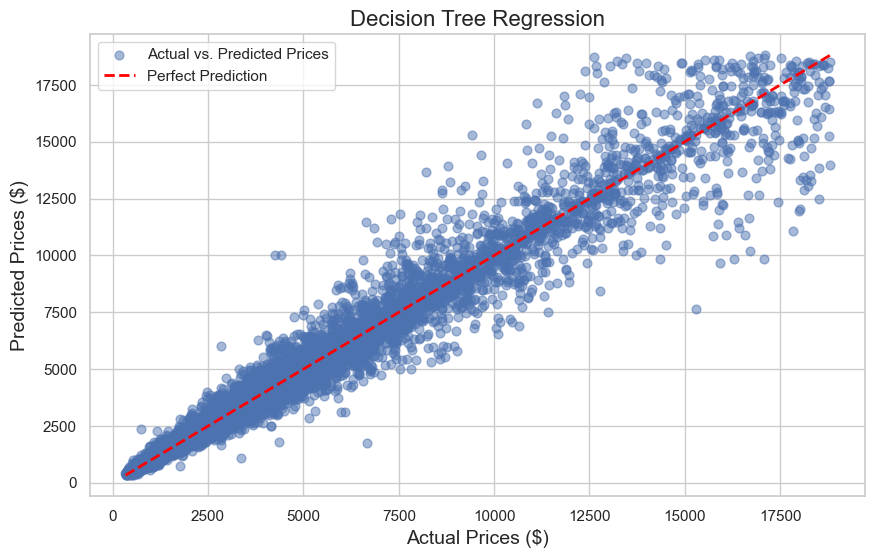

In [87]:
# Create the predicted and actual values
DT_pred = np.array(DT_pred)
y_test = np.array(y_test)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, DT_pred, alpha=0.5, color='b', s=40, label='Actual vs. Predicted Prices')
plt.xlabel('Actual Prices ($)', fontsize=14)
plt.ylabel('Predicted Prices ($)', fontsize=14)
plt.title('Decision Tree Regression', fontsize=16)

# Add a diagonal line (perfect prediction line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.legend()
plt.show()


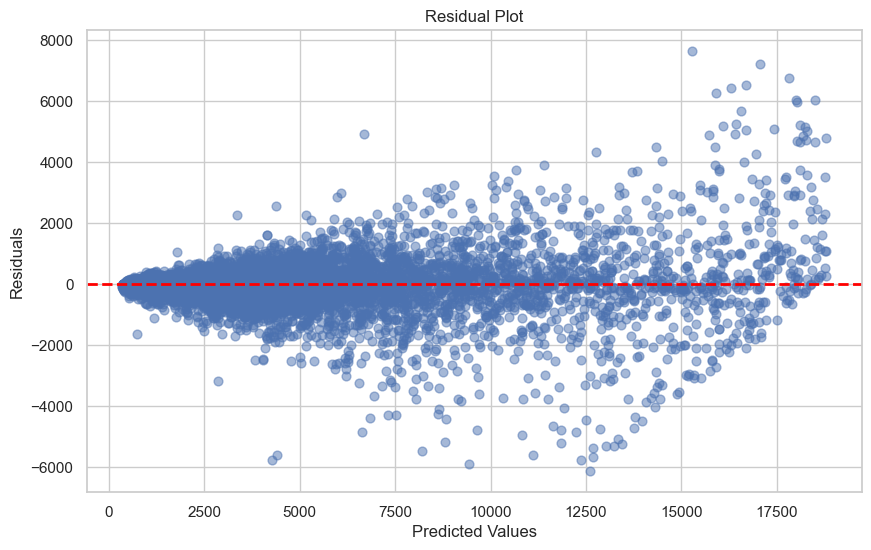

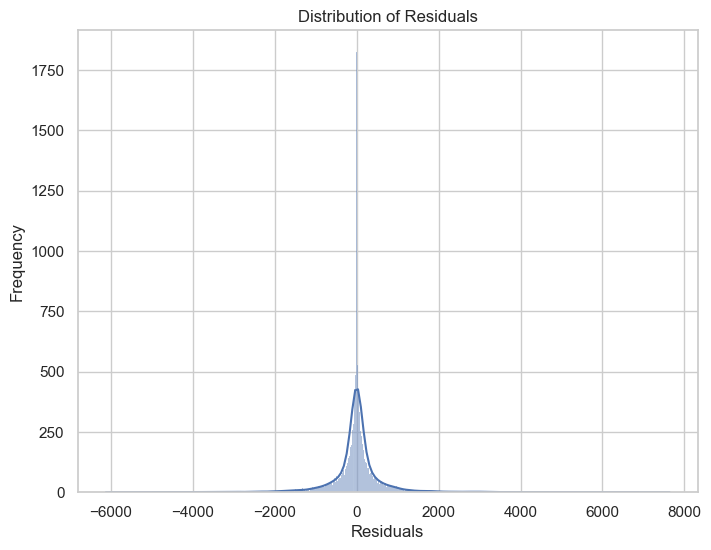

In [88]:
# Calculate the residuals
residuals = y_test - DT_pred

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='b', s=40)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.show()

# Plot 2: Distribution of Residuals (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(y_test - DT_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


## XGBoost

In [89]:
xr = XGBRegressor()
xr.fit(x_train,y_train)
xgb_pred = xr.predict(x_test)


print("After Performing XGBoost Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,xgb_pred)}")
xg = 1-(1-metrics.r2_score(y_test,xgb_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,xgb_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,xgb_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,xgb_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,xgb_pred,squared = False)}")

After Performing XGBoost Regression,

R Squared Value: 0.9801933372679246
Adjusted R Squared Value: 0.9801822957389463
Mean Absolute Error: 282.80039567726016
Mean Squared Error: 302566.6335987021
Root Mean Squared Error: 550.0605726633223


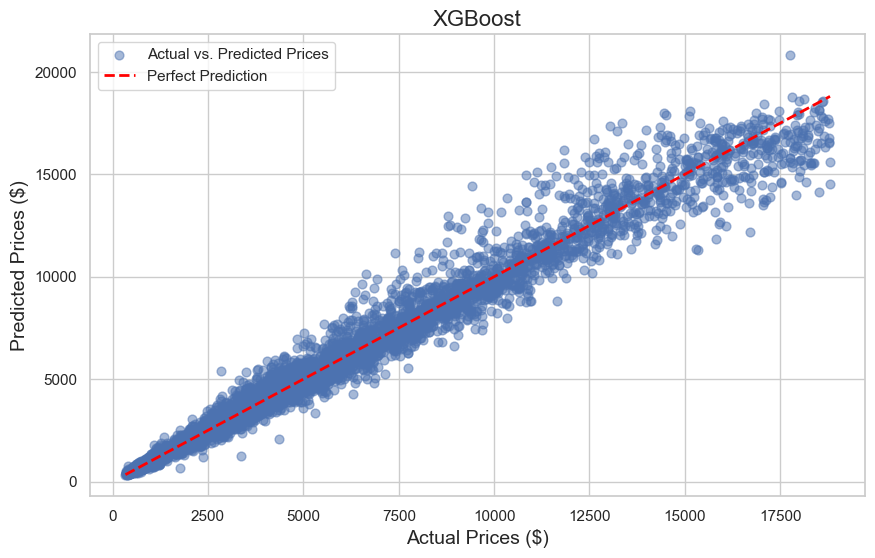

In [90]:
# Create the predicted and actual values
xgb_pred = np.array(xgb_pred)
y_test = np.array(y_test)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, alpha=0.5, color='b', s=40, label='Actual vs. Predicted Prices')
plt.xlabel('Actual Prices ($)', fontsize=14)
plt.ylabel('Predicted Prices ($)', fontsize=14)
plt.title('XGBoost', fontsize=16)

# Add a diagonal line (perfect prediction line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.legend()
plt.show()

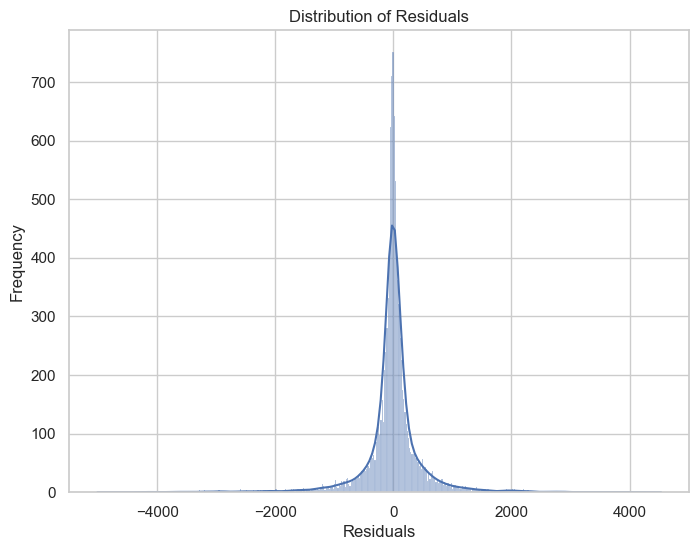

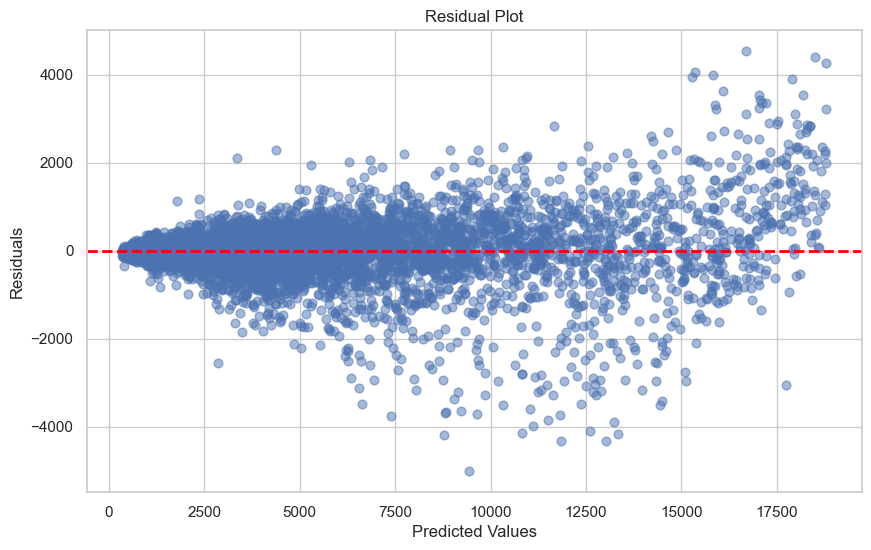

In [91]:
# Plot 2: Distribution of Residuals (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(y_test - xgb_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

# Calculate the residuals
residuals = y_test - xgb_pred

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='b', s=40)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.show()

## The Best Performance Model

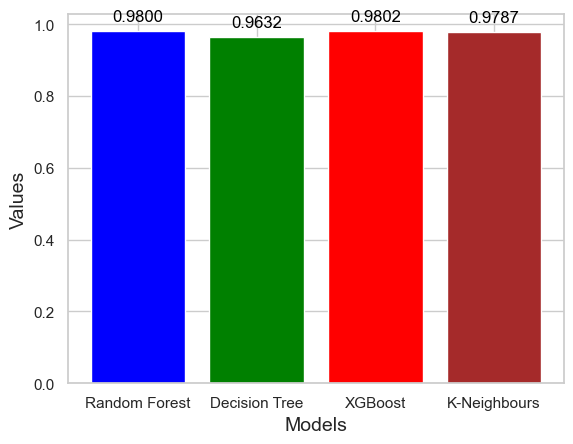

The best performance model is XGBoost with 0.9802


In [92]:
# Data
categories = ['Random Forest', 'Decision Tree', 'XGBoost', 'K-Neighbours']
values = [rfr1, dtr, xg, knr2] 

# Create a bar chart
plt.bar(categories, values, color=['blue', 'green', 'red', 'brown'])

# Add labels and a title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Values', fontsize=14)

for i, v in enumerate(values):
    formatted_value = "{:.4f}".format(v)
    plt.text(i, v + 0.02, formatted_value, ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()

#conclusion
highest_value = max(values)
highest_category = categories[values.index(highest_value)]
print(f"The best performance model is {highest_category} with {highest_value:.4f}")


<a id="16"></a>
# <p style="padding:10px;background-color:#D198C5FF;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Prediction</p>

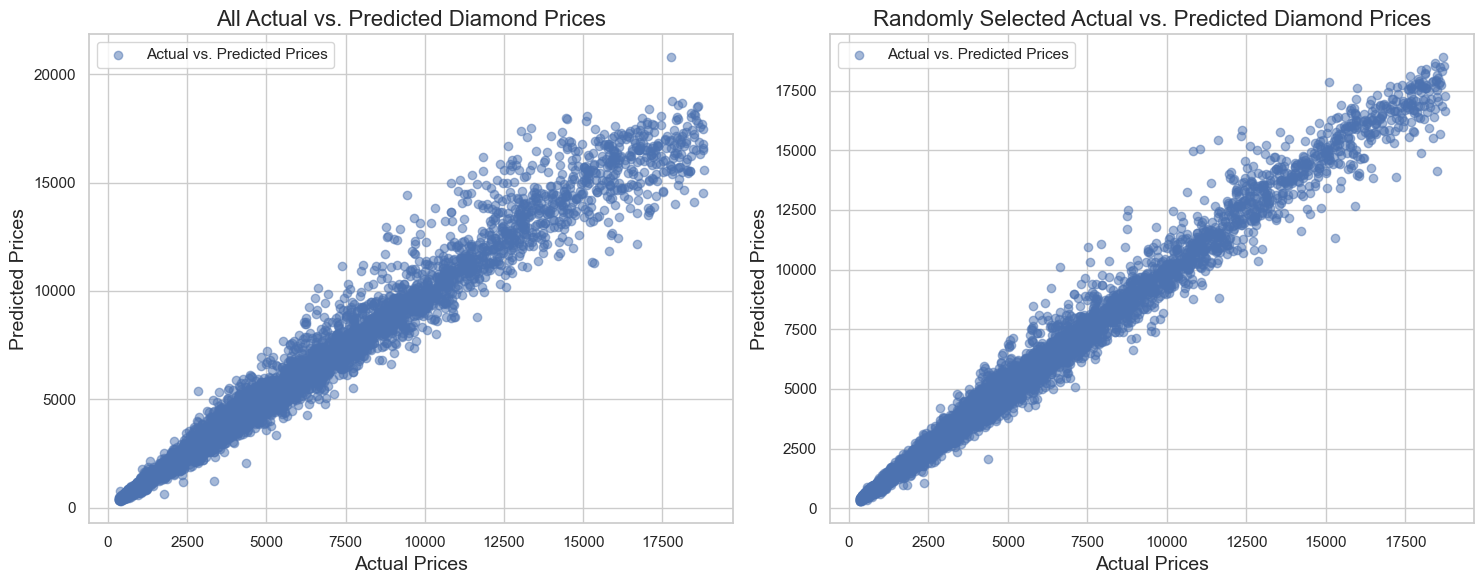

In [93]:
# First subplot (left)
rf = XGBRegressor()
rf.fit(x_train,y_train)
y_pred = xr.predict(x_test)
plt.figure(figsize=(15, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot

# Create a scatter plot for the first subplot
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Actual vs. Predicted Prices')
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.title('All Actual vs. Predicted Diamond Prices', fontsize=16)
plt.legend()
plt.grid(True)

# Second subplot (right)===========================================================================================
randomly_selected_data = data.sample(frac=0.80, random_state=42)
sc = StandardScaler()

# For example, you can fill NaN values with the mean of each column
x=randomly_selected_data.drop(columns='price')
x = sc.fit_transform(x)
y= randomly_selected_data["price"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

rf = XGBRegressor()
rf.fit(x_train1,y_train1)
y_pred1 = xr.predict(x_test1)


plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
# Create a scatter plot for the second subplot
plt.scatter(y_test1, y_pred1, alpha=0.5, color='b', label='Actual vs. Predicted Prices')
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.title('Randomly Selected Actual vs. Predicted Diamond Prices', fontsize=16)
plt.legend()
plt.grid(True)

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the combined plot
plt.show()


## UI 

https://predictdiamondprice-3fdnfppz3klbbg6674z9uh.streamlit.app/

In [94]:
# Train the XGBRegressor
xr = XGBRegressor()
xr.fit(x_train, y_train)

# Save the trained model to a file
joblib.dump(xr, 'model.pkl')

['model.pkl']

In [95]:
# Load your trained scikit-learn KNeighborsRegressor model here
model = joblib.load('model.pkl')

# Dictionary to encode color and clarity
color_encoding = {"b'J'": 1, "b'I'": 2, "b'H'": 3, "b'G'": 4, "b'F'": 5, "b'E'": 6, "b'D'": 7}
clarity_encoding = {"b'I1'": 1, "b'SI2'": 2, "b'SI1'": 3, "b'VS2'": 4, "b'VS1'": 5, "b'VVS2'": 6, "b'VVS1'": 7, "b'IF'": 8}
def encode_color(color):
    return color_encoding.get(color, 0)  # Default to 0 if color is not found

def encode_clarity(clarity):
    return clarity_encoding.get(clarity, 0)  # Default to 0 if clarity is not found

def predict_price(row):
    try:
        # Extract values from the row
        carat = float(row[0])
        color = encode_color(row[2])  # Encode color
        clarity = encode_clarity(row[3])  # Encode clarity
        x = float(row[6])
        y = float(row[7])
        z = float(row[8])

        # Make price predictions using the model
        input_data = np.array([carat, color, clarity, x, y, z]).reshape(1, -1)
        print(input_data)
        predicted_price = model.predict(input_data)

        return predicted_price[0]
    except Exception as e:
        messagebox.showerror("Prediction Error", f"An error occurred while making predictions: {str(e)}")
        return None

def bulk_import_and_predict():
    # Open a file dialog for the user to select a dataset file (CSV format)
    file_path = filedialog.askopenfilename(filetypes=[("Excel Files", "*.xlsx *.xls"), ("CSV Files", "*.csv")])

    if file_path:
        try:
            if file_path.endswith('.xlsx') or file_path.endswith('.xls'):
                df = pd.read_excel(file_path, header=None)
            elif file_path.endswith('.csv'):
                df = pd.read_csv(file_path, header=None)

            # Predict prices for each row and add a new column 'Predicted Price' to the dataset
            df['Predicted Price'] = df.apply(predict_price, axis=1)

            # Display the dataset with predictions in a new window
            show_dataset_window(df)

            # Optionally, you can save the dataset with predictions to a new CSV file.
            # df.to_csv('predicted_dataset.csv', index=False)

        except Exception as e:
            messagebox.showerror("Import Error", f"An error occurred while importing the dataset: {str(e)}")
            
def show_dataset_window(dataset):
    dataset_window = tk.Toplevel()
    dataset_window.title("Imported Dataset with Predictions")

    # Create a Treeview widget to display the dataset
    tree = ttk.Treeview(dataset_window)

    # Define columns with headings
    columns_with_headings = [
        "carat","cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"
    ]

    # Set column headings
    tree["columns"] = columns_with_headings

    # Configure columns
    for column in columns_with_headings:
        tree.column(column, anchor="w", width=100)
        tree.heading(column, text=column, anchor="w")

    # Insert data rows
    for _, row in dataset.iterrows():
        tree.insert("", "end", values=list(row))

    tree.pack(fill="both", expand=True)

# Create the Tkinter window
cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_mapping = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
clarity_mapping = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

def predict_diamond_price():
    try:
        carat = float(carat_scale.get())
        
        # Check if any combobox is left blank
        if not cut_combobox.get() or not color_combobox.get() or not clarity_combobox.get():
            raise ValueError("Please select values for Cut, Color, and Clarity.")

        cut = cut_mapping[cut_combobox.get()]  # Map combobox value to numeric value
        color = color_mapping[color_combobox.get()]  # Map combobox value to numeric value
        clarity = clarity_mapping[clarity_combobox.get()]  # Map combobox value to numeric value
        depth = float(depth_scale.get())
        table = float(table_scale.get())
        x = float(x_scale.get())
        y = float(y_scale.get())
        z = float(z_scale.get())

        user_input = np.array([carat, color, clarity, x, y, z]).reshape(1, -1)
        print(user_input)
        predicted_price = model.predict(user_input)

        # Update the label with a larger font and red color
        predicted_label.config(text=f'Predicted Price: ${predicted_price[0]:.2f}', font=("Helvetica", 16), fg="red")

    except ValueError as e:
        messagebox.showerror("Error", str(e))




# Create the Tkinter window
window = tk.Tk()
window.title("Diamond Price Prediction")
window.geometry("400x650")  # Set the initial window size

# Labels and input fields
carat_label = tk.Label(window, text="Carat:")
carat_label.pack()

# Use ttk.Scale for carat input
carat_scale = ttk.Scale(window, from_=0.2, to=5.01, length=200, orient="horizontal")
carat_scale.pack()

# Label to display carat value
carat_value_label = ttk.Label(window, text="0.2")
carat_value_label.pack()

def update_carat_value(value):
    carat_value_label.config(text=f"{value:.2f}")

carat_scale.config(command=lambda value: update_carat_value(carat_scale.get()))

# Depth
depth_label = tk.Label(window, text="Depth:")
depth_label.pack()
depth_scale = ttk.Scale(window, from_=40, to=80, length=200, orient="horizontal")
depth_scale.pack()
depth_value_label = ttk.Label(window, text="40")
depth_value_label.pack()

cut_label = tk.Label(window, text="Cut:")
cut_label.pack()
cut_options = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
cut_combobox = ttk.Combobox(window, values=cut_options)
cut_combobox.pack()

color_label = tk.Label(window, text="Color:")
color_label.pack()
color_options = ["J", "I", "H", "G", "F", "E", "D"]
color_combobox = ttk.Combobox(window, values=color_options)
color_combobox.pack()

clarity_label = tk.Label(window, text="Clarity:")
clarity_label.pack()
clarity_options = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
clarity_combobox = ttk.Combobox(window, values=clarity_options)
clarity_combobox.pack()


def update_depth_value(value):
    depth_value_label.config(text=f"{value:.2f}")

depth_scale.config(command=lambda value: update_depth_value(depth_scale.get()))

# Table
table_label = tk.Label(window, text="Table:")
table_label.pack()
table_scale = ttk.Scale(window, from_=50, to=80, length=200, orient="horizontal")
table_scale.pack()
table_value_label = ttk.Label(window, text="50")
table_value_label.pack()

def update_table_value(value):
    table_value_label.config(text=f"{value:.2f}")

table_scale.config(command=lambda value: update_table_value(table_scale.get()))

# Length (mm)
x_label = tk.Label(window, text="Length (mm):")
x_label.pack()
x_scale = ttk.Scale(window, from_=0, to=10, length=200, orient="horizontal")
x_scale.pack()
x_value_label = ttk.Label(window, text="0")
x_value_label.pack()

def update_x_value(value):
    x_value_label.config(text=f"{value:.2f}")

x_scale.config(command=lambda value: update_x_value(x_scale.get()))

# Width (mm)
y_label = tk.Label(window, text="Width (mm):")
y_label.pack()
y_scale = ttk.Scale(window, from_=0, to=10, length=200, orient="horizontal")
y_scale.pack()
y_value_label = ttk.Label(window, text="0")
y_value_label.pack()

def update_y_value(value):
    y_value_label.config(text=f"{value:.2f}")

y_scale.config(command=lambda value: update_y_value(y_scale.get()))

# Depth (mm)
z_label = tk.Label(window, text="Depth (mm):")
z_label.pack()
z_scale = ttk.Scale(window, from_=0, to=10, length=200, orient="horizontal")
z_scale.pack()
z_value_label = ttk.Label(window, text="0")
z_value_label.pack()

def update_z_value(value):
    z_value_label.config(text=f"{value:.2f}")

z_scale.config(command=lambda value: update_z_value(z_scale.get()))


# Predict button
predict_button = tk.Button(window, text="Predict Diamond Price", command=predict_diamond_price)
predict_button.pack()

# Display predicted price
predicted_label = tk.Label(window, text="", font=("Helvetica", 16), fg="red")
predicted_label.pack()



# Create a "Bulk Import" button
bulk_import_button = tk.Button(window, text="Bulk Import and Predict", command=bulk_import_and_predict)
bulk_import_button.pack()

# Start the Tkinter main loop
window.mainloop()

[[1.         2.         2.         3.         6.29032258 5.91397849]]
[[0.21 6.   3.   3.89 3.84 2.31]]
[[0.23 6.   5.   4.05 4.07 2.31]]
[[0.29 2.   4.   4.2  4.23 2.63]]
[[0.31 1.   2.   4.34 4.35 2.75]]
[[0.24 1.   6.   3.94 3.96 2.48]]
[[0.24 2.   7.   3.95 3.98 2.47]]
[[0.26 3.   3.   4.07 4.11 2.53]]
[[0.22 6.   4.   3.87 3.78 2.49]]
[[0.23 3.   5.   4.   4.05 2.39]]
[[0.3  1.   3.   4.25 4.28 2.73]]
[[0.23 1.   5.   3.93 3.9  2.46]]
[[0.22 5.   3.   3.88 3.84 2.33]]
[[0.31 1.   2.   4.35 4.37 2.71]]
[[0.2  6.   2.   3.79 3.75 2.27]]
[[0.32 6.   1.   4.38 4.42 2.68]]
[[0.3  2.   2.   4.31 4.34 2.68]]
[[0.3  1.   3.   4.23 4.29 2.7 ]]
[[0.3  1.   3.   4.23 4.26 2.71]]
[[0.3  1.   3.   4.21 4.27 2.66]]
